<a href="https://colab.research.google.com/github/Shahidulla-Vantela/Bank-Marketing-HWU-Project/blob/main/BankingDataSet_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PIP Statements

In [ ]:
#!pip install dython

#Import Statements

In [ ]:
import sys
assert sys.version_info >= (3,5)

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_curve
assert sklearn.__version__ >= "0.20"

In [ ]:
import numpy as np
import os
import pandas as pd

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from dython.nominal import associations

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis

In [ ]:
file_path = "https://raw.githubusercontent.com/zabull1/bank_dataset/master/bank-full.csv"
def load_data():
    return pd.read_csv(file_path, sep = ';') #Specified separation parameter

In [ ]:
df = load_data()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41252,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no
36364,42,blue-collar,married,secondary,yes,-204,yes,no,cellular,11,may,34,1,361,7,failure,no
20624,31,management,single,tertiary,no,1858,no,no,cellular,12,aug,453,3,-1,0,unknown,yes
39268,34,blue-collar,married,secondary,no,463,yes,no,cellular,18,may,11,11,360,4,failure,no
7739,29,self-employed,single,tertiary,no,121,yes,no,unknown,30,may,1500,2,-1,0,unknown,yes


In [ ]:
df.shape #Our dataset has 45211 instances and 17 attributes

(45211, 17)

In [ ]:
df_columns = df.columns
df_columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')



```
Description:
There are Seventeen number of attributes
bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - balance: Account balance (numeric)
7 - housing: has housing loan? (categorical: 'no','yes','unknown')
8 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')
10 - day: date of the month(categorical: 1 to 31)
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
len(df_columns) #we have 17 attributes

17

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().any().values.sum() #There are zeo missing values. However, we have unknowns values

0

In [ ]:
df.duplicated().values.sum() # There is no duplicated values

0

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'default' , 'housing',
       'loan', 'contact', 'day', 'month','poutcome', 'y'] #Declaring the attributes that are categorical in nature.

In [ ]:
numerical_columns= ['age','balance', 'duration', 'campaign','pdays','previous'] #Declaring the attributes that are numerical in nature.
numerical_columns

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
for column in categorical_columns:
    display(df[column].name)
    display(df[column].value_counts()) #Displaying specifics in attributes and their instances.

'job'

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

'marital'

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

'education'

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

'default'

no     44396
yes      815
Name: default, dtype: int64

'housing'

yes    25130
no     20081
Name: housing, dtype: int64

'loan'

no     37967
yes     7244
Name: loan, dtype: int64

'contact'

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

'day'

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

'month'

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

'poutcome'

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

'y'

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# for column in numerical_columns:
#     display(df[column].name)
#     display(df[column].value_counts())

In [ ]:
df.describe() #Displays some statistical data about the dataframe.

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Visualization

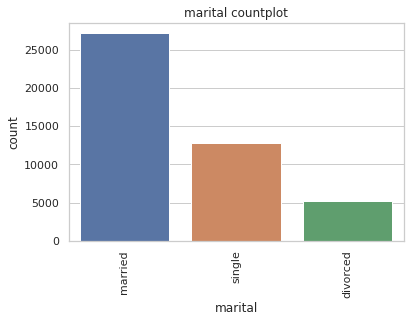

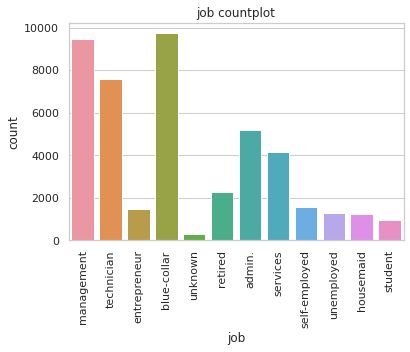

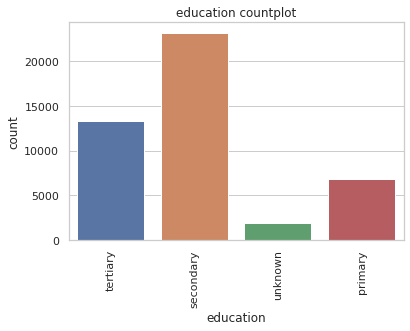

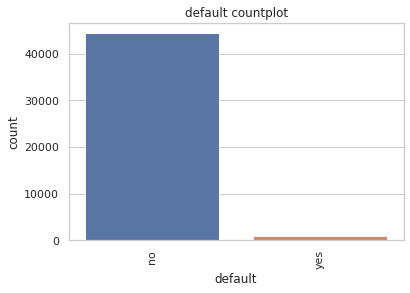

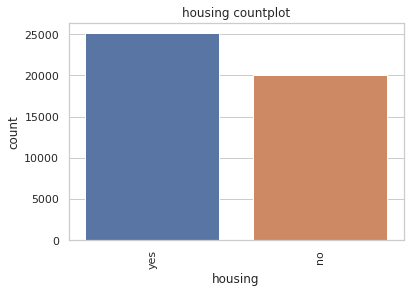

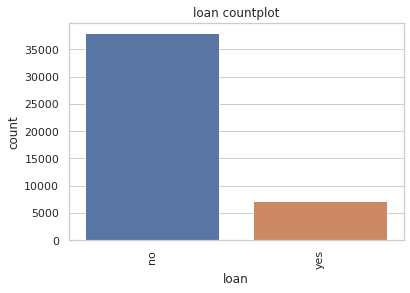

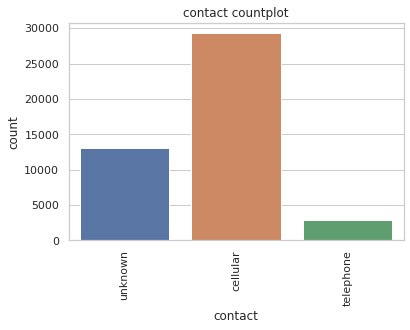

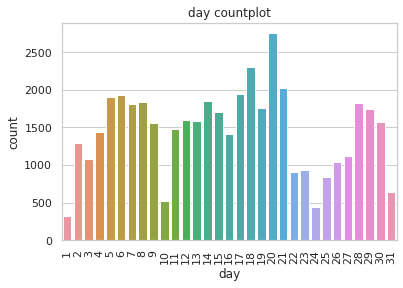

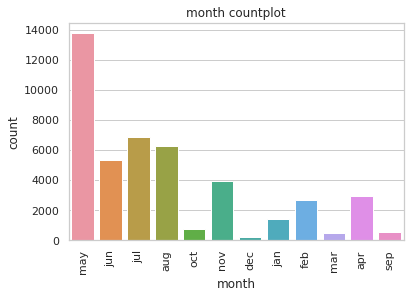

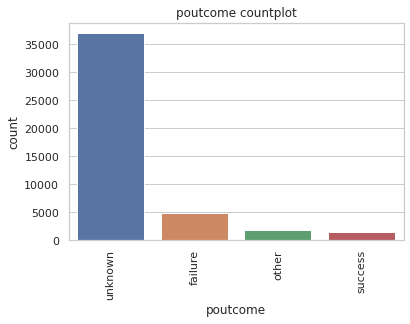

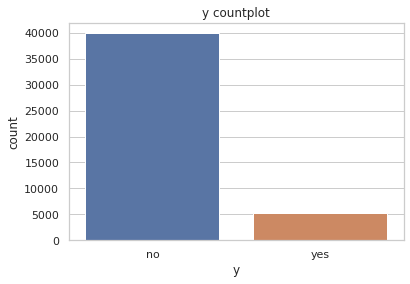

In [ ]:
sns.set_theme(style="whitegrid")

i = 0;
for column in categorical_columns:
    plt.xticks(rotation=90)
    plt.figure(i)
    i = i + 1
    plt.title(df[column].name + " countplot")
    sns.countplot(x = df[column]) #Visualising the data we found in the for() loop above.

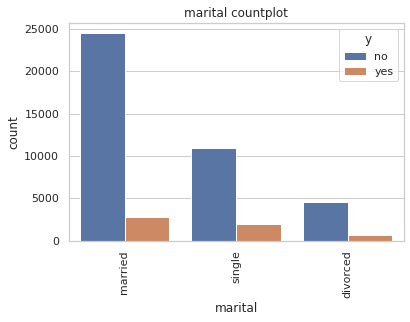

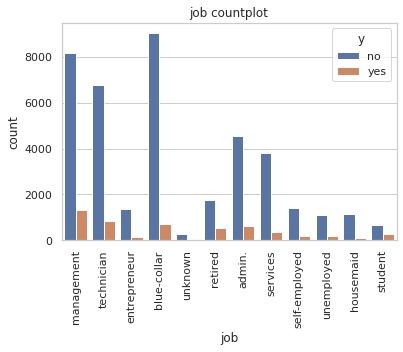

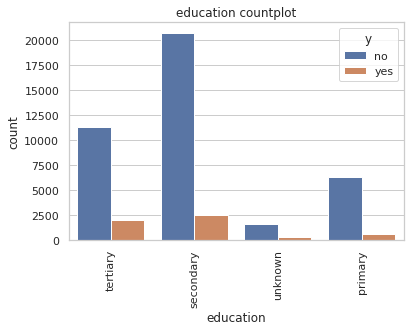

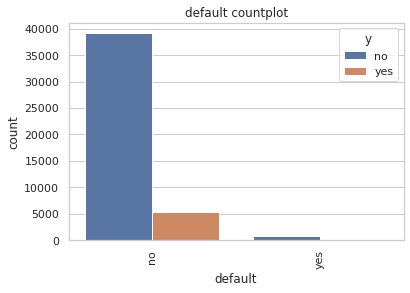

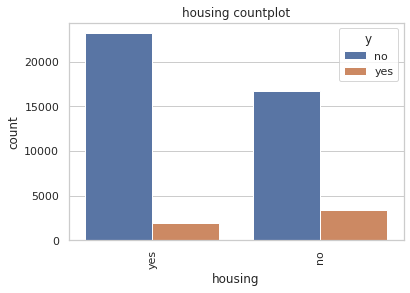

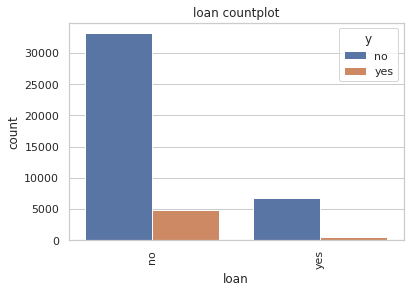

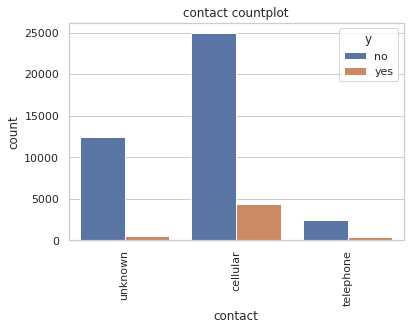

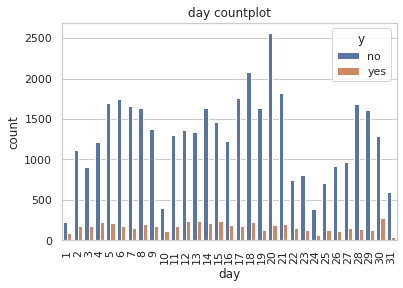

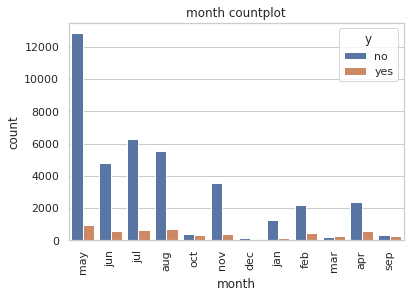

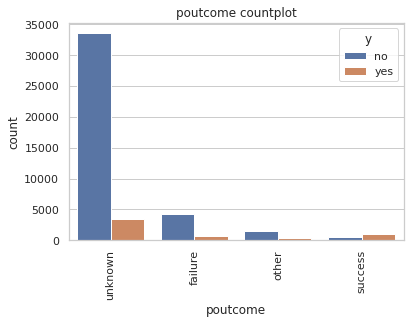

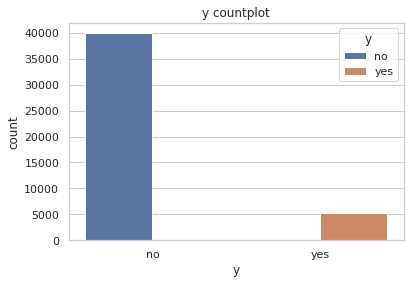

In [ ]:
sns.set_theme(style="whitegrid")

i = 0;
for column in categorical_columns:
    plt.xticks(rotation=90)
    plt.figure(i)
    i = i + 1
    plt.title(df[column].name + " countplot")
    sns.countplot(x = df[column], hue= df.y) #Comparing the same data with our target class.

In [ ]:
df.drop(['poutcome'], axis= 1, inplace=True) # We decided to drop this attribute because most of the records are unknown

In [ ]:
categorical_columns = ['job', 'marital', 'education', 'default' , 'housing',
       'loan', 'contact', 'day', 'month', 'y'] #Redefining categorical variable as we dropped poutcome attribute above.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96886b8e10>,
      dtype=object)

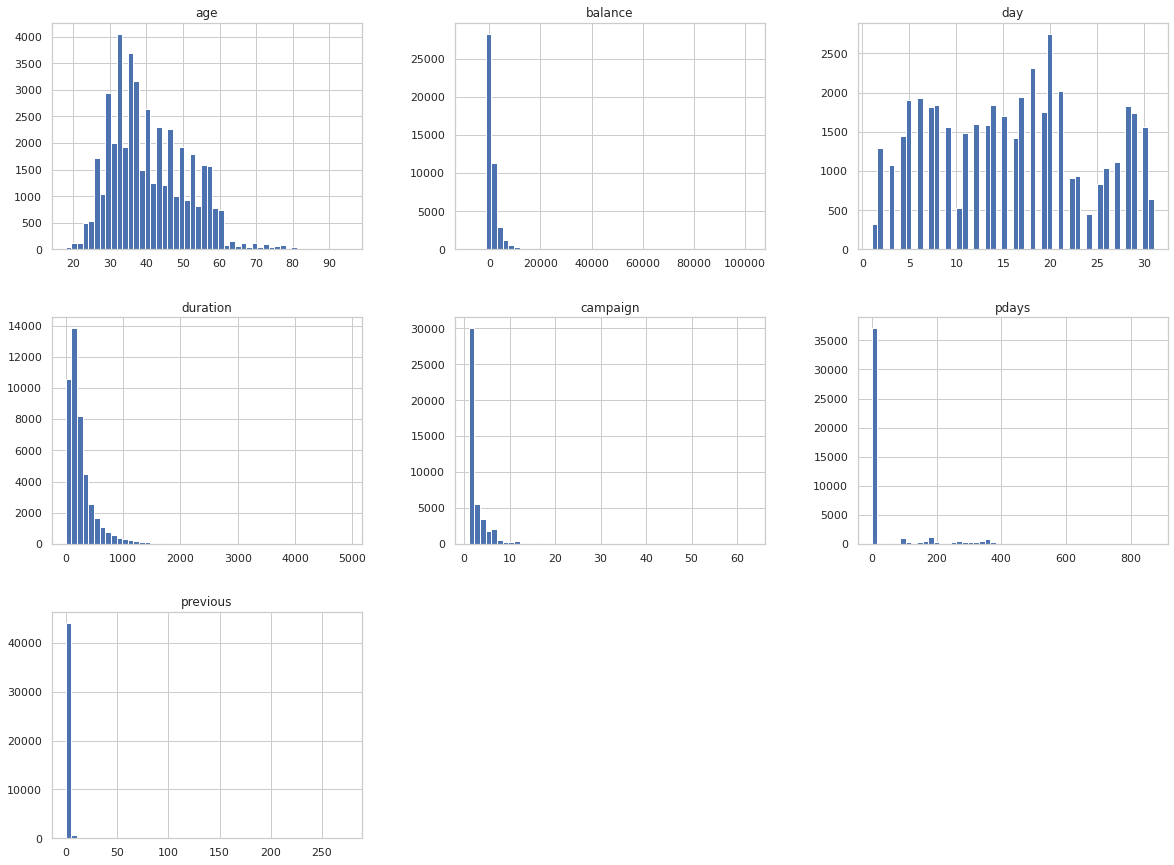

In [ ]:
df.hist(bins=50, figsize=(20,15)) #Displaying a Histogram with 50 bins and custom figsize.

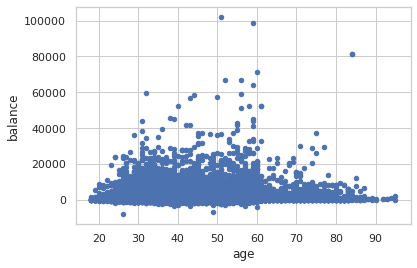

In [ ]:
df.plot(kind='scatter',x='age',y='balance') #Scatterplot without target class.

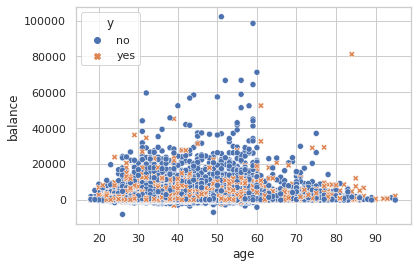

In [ ]:
plt.figsize=(20,15)
sns.scatterplot(data = df, x = "age", y = 'balance', hue= "y", style = "y") #Scatterplot with target class.

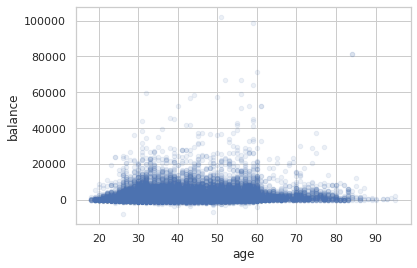

In [ ]:
df.plot(kind='scatter',x='age',y='balance', alpha=0.1) #Customising the plot's alpha to show concentration.

##Correlation

In [ ]:
# corr_matrix= associations(df,nom_nom_assoc='theil',mark_columns= True, figsize=(32,16)) #Custom correlation matrix
# corr_matrix= associations(df,nom_nom_assoc='theil', figsize=(32,16))
# corr_matrix

In [ ]:
#corr_matrix['corr']["y"].sort_values(ascending = False) #Correlating attributes to our target class and displaying the result in a descending order.

#Attribute Selection

In [ ]:
df_2 = df.copy() # deepcopy
df_5 = df.copy()
df_10 = df.copy()

In [ ]:
df_2.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'campaign','previous'], axis= 1, inplace= True)
df_2

,duration,pdays,y
0,261,-1,no
1,151,-1,no
2,76,-1,no
3,92,-1,no
4,198,-1,no
...,...,...,...
45206,977,-1,yes
45207,456,-1,yes
45208,1127,184,yes
45209,508,-1,no


In [ ]:
df_5.drop(['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month','day'], axis= 1, inplace= True)
df_5

,balance,duration,campaign,pdays,previous,y
0,2143,261,1,-1,0,no
1,29,151,1,-1,0,no
2,2,76,1,-1,0,no
3,1506,92,1,-1,0,no
4,1,198,1,-1,0,no
...,...,...,...,...,...,...
45206,825,977,3,-1,0,yes
45207,1729,456,2,-1,0,yes
45208,5715,1127,5,184,3,yes
45209,668,508,4,-1,0,no


In [ ]:
df_10.drop(['job', 'marital', 'education', 'default',
       'loan'], axis= 1, inplace= True)
df_10

,age,balance,housing,contact,day,month,duration,campaign,pdays,previous,y
0,58,2143,yes,unknown,5,may,261,1,-1,0,no
1,44,29,yes,unknown,5,may,151,1,-1,0,no
2,33,2,yes,unknown,5,may,76,1,-1,0,no
3,47,1506,yes,unknown,5,may,92,1,-1,0,no
4,33,1,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,cellular,17,nov,977,3,-1,0,yes
45207,71,1729,no,cellular,17,nov,456,2,-1,0,yes
45208,72,5715,no,cellular,17,nov,1127,5,184,3,yes
45209,57,668,no,telephone,17,nov,508,4,-1,0,no


#Data Pre-Processing

In [ ]:
df[categorical_columns]

,job,marital,education,default,housing,loan,contact,day,month,y
0,management,married,tertiary,no,yes,no,unknown,5,may,no
1,technician,single,secondary,no,yes,no,unknown,5,may,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,no
3,blue-collar,married,unknown,no,yes,no,unknown,5,may,no
4,unknown,single,unknown,no,no,no,unknown,5,may,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,17,nov,yes
45207,retired,divorced,primary,no,no,no,cellular,17,nov,yes
45208,retired,married,secondary,no,no,no,cellular,17,nov,yes
45209,blue-collar,married,secondary,no,no,no,telephone,17,nov,no


In [ ]:
df[numerical_columns]

,age,balance,duration,campaign,pdays,previous
0,58,2143,261,1,-1,0
1,44,29,151,1,-1,0
2,33,2,76,1,-1,0
3,47,1506,92,1,-1,0
4,33,1,198,1,-1,0
...,...,...,...,...,...,...
45206,51,825,977,3,-1,0
45207,71,1729,456,2,-1,0
45208,72,5715,1127,5,184,3
45209,57,668,508,4,-1,0


In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
scaled_df_num = scaler.fit_transform(df[numerical_columns])
scaled_df_num

array([[ 1.60696496,  0.25641925,  0.0110161 , -0.56935064, -0.41145311,
        -0.25194037],
       [ 0.28852927, -0.43789469, -0.41612696, -0.56935064, -0.41145311,
        -0.25194037],
       [-0.74738448, -0.44676247, -0.70736086, -0.56935064, -0.41145311,
        -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  3.37379688,  0.72181052,  1.43618859,
         1.05047333],
       [ 1.51279098, -0.22802402,  0.97014641,  0.39902023, -0.41145311,
        -0.25194037],
       [-0.37068857,  0.52836436,  0.39932797, -0.24656035,  1.4761376 ,
         4.52357654]])

In [ ]:
scaled_df_num_features = scaler.feature_names_in_
scaled_df_num_features

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'],
      dtype=object)

In [ ]:
scaled_df_num = pd.DataFrame(scaled_df_num, columns= scaled_df_num_features , index = df.index)
scaled_df_num

,age,balance,duration,campaign,pdays,previous
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940


In [ ]:
encoder = OneHotEncoder(sparse= False)

In [ ]:
df_1hot = encoder.fit_transform(df[categorical_columns])
df_1hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [ ]:
df_1hot.shape

(45211, 73)

In [ ]:
df_1hot_features = encoder.categories_
df_1hot_features

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [ ]:
df_1hot_features=['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown', 'divorced', 'married', 'single','primary', 'secondary', 'tertiary', 'unknown','no_default', 'yes_default', 'no_housing', 'yes_housing','no_loan', 'yes_loan', 'cellular', 'telephone', 'unknown','1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17',
        '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31','apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep','no', 'yes' ]
#df_1hot_features

In [ ]:
pd.concat([df[numerical_columns],df[categorical_columns]], axis=1)

,age,balance,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,day,month,y
0,58,2143,261,1,-1,0,management,married,tertiary,no,yes,no,unknown,5,may,no
1,44,29,151,1,-1,0,technician,single,secondary,no,yes,no,unknown,5,may,no
2,33,2,76,1,-1,0,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,no
3,47,1506,92,1,-1,0,blue-collar,married,unknown,no,yes,no,unknown,5,may,no
4,33,1,198,1,-1,0,unknown,single,unknown,no,no,no,unknown,5,may,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,technician,married,tertiary,no,no,no,cellular,17,nov,yes
45207,71,1729,456,2,-1,0,retired,divorced,primary,no,no,no,cellular,17,nov,yes
45208,72,5715,1127,5,184,3,retired,married,secondary,no,no,no,cellular,17,nov,yes
45209,57,668,508,4,-1,0,blue-collar,married,secondary,no,no,no,telephone,17,nov,no


In [ ]:
df_1hot_merged = pd.DataFrame(df_1hot, columns= df_1hot_features, index = df.index)
df_1hot_merged

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,jan,jul,jun,mar,may,nov,oct,sep,no,yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_concat = pd.concat([scaled_df_num,df_1hot_merged], axis=1)
df_concat

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,jan,jul,jun,mar,may,nov,oct,sep,no,yes
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
enc = OrdinalEncoder()
y = enc.fit_transform(df[['y']])
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [ ]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [ ]:
# target = df_1hot_merged[['no', 'yes']]
target = pd.DataFrame(y, columns=['y'], index= df.index)
target

,y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
45206,1.0
45207,1.0
45208,1.0
45209,0.0


In [ ]:
# features_1hot = df_1hot_merged.drop(['no', 'yes'], axis = 1)
features_1hot = df_concat.drop(['no', 'yes'], axis = 1)
features_1hot

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#Using Hold-out method

##Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_1hot, target, test_size= 0.25, random_state =100)

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
reg.score(X_train, y_train)

0.8964846054028548

In [ ]:
y_predict = reg.predict(X_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
accuracy_score(y_test,y_predict)

0.8945412722286119

In [ ]:
conf_matrix_LR = confusion_matrix(y_test,y_predict)
conf_matrix_LR

array([[9732,  262],
       [ 930,  379]])

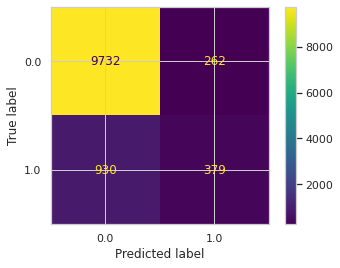

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg, X_test,y_test)

In [ ]:
TP_rate = conf_matrix_LR[0,0]/(conf_matrix_LR[0,0]+conf_matrix_LR[0,1])
TP_rate #senssitivity

0.9737842705623374

In [ ]:
FP_rate = conf_matrix_LR[1,1]/(conf_matrix_LR[1,1]+conf_matrix_LR[1,0])
FP_rate #specificity

0.28953399541634833

In [ ]:
success_rate = (conf_matrix_LR[0,0]+conf_matrix_LR[1,1])/(conf_matrix_LR[0,0]+conf_matrix_LR[0,1]+conf_matrix_LR[1,0]+conf_matrix_LR[1,1])
success_rate

0.8945412722286119

In [ ]:
error_rate = (conf_matrix_LR[0,1]+conf_matrix_LR[1,0])/(conf_matrix_LR[0,0]+conf_matrix_LR[0,1]+conf_matrix_LR[1,0]+conf_matrix_LR[1,1])
error_rate

0.10545872777138812

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      9994
         1.0       0.59      0.29      0.39      1309

    accuracy                           0.89     11303
   macro avg       0.75      0.63      0.67     11303
weighted avg       0.88      0.89      0.88     11303



In [ ]:
print(roc_curve(y_test,y_predict))

(array([0.        , 0.02621573, 1.        ]), array([0.      , 0.289534, 1.      ]), array([2., 1., 0.]))


##Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
clf_y_predict = clf.predict(X_test)

In [ ]:
conf_matrix_DT= confusion_matrix(y_test, clf_y_predict)
conf_matrix_DT

array([[9248,  746],
       [ 681,  628]])

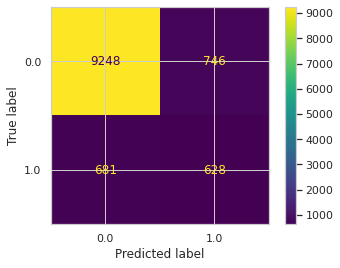

In [ ]:
plot_confusion_matrix(clf, X_test,y_test)

In [ ]:
print(classification_report(y_test, clf_y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      9994
         1.0       0.46      0.48      0.47      1309

    accuracy                           0.87     11303
   macro avg       0.69      0.70      0.70     11303
weighted avg       0.88      0.87      0.88     11303



In [ ]:
def CF(cm):
  TP_rate = cm[0,0]/(cm[0,0]+cm[0,1])
  display(TP_rate)
  FP_rate = cm[1,1]/(cm[1,1]+cm[1,0])
  display(FP_rate)
  #returrn (TP_rate,FP_rate)

In [ ]:
TP_rate = conf_matrix_DT[0,0]/(conf_matrix_DT[0,0]+conf_matrix_DT[0,1])
display(TP_rate)
FP_rate = conf_matrix_DT[1,1]/(conf_matrix_DT[1,1]+conf_matrix_DT[1,0])
FP_rate

0.9253552131278767

0.479755538579068

In [ ]:
CF(conf_matrix_DT)

0.9253552131278767

0.479755538579068

In [ ]:
precision_score(y_test, clf_y_predict)

0.4570596797671033

In [ ]:
recall_score(y_test, clf_y_predict)

0.479755538579068

In [ ]:
f1_score(y_test, clf_y_predict)

0.4681326872903466

In [ ]:
accuracy_score(y_test, clf_y_predict)

0.8737503317703265

#Using K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
model=tree.DecisionTreeClassifier()
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
results =cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'accuracy')
print(results)
print(np.mean(results))

[0.92901371 0.91904446 0.90776377 0.86241982 0.75868171 0.81928777
 0.65892502 0.80181376 0.79827472 0.56890069]
0.8024125411698574


In [ ]:
def crv(cv):
  display(cv)
  display(np.mean(cv))

In [ ]:
display(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'accuracy'))
np.mean(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'accuracy'))

array([0.92989828, 0.92147755, 0.92081398, 0.87502765, 0.76310551,
       0.81840301, 0.68015926, 0.79340854, 0.79473568, 0.57000664])

0.8050889597623005

In [ ]:
crv(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'accuracy'))

array([0.93011942, 0.9247954 , 0.90798496, 0.85821721, 0.77504977,
       0.81309445, 0.66710905, 0.79982305, 0.800929  , 0.57044902])

0.8047571307362048

In [ ]:
crv(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'precision'))

array([0.19551282, 0.21582734, 0.2005571 , 0.21596244, 0.13157895,
       0.14600551, 0.16297262, 0.32342449, 0.39494681, 0.57212544])

0.25589135193309065

In [ ]:
crv(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'recall'))

array([0.42222222, 0.34319527, 0.33027523, 0.48275862, 0.5326087 ,
       0.37992832, 0.51162791, 0.4856661 , 0.40440165, 0.39220291])

0.4284886923920407

In [ ]:
crv(cross_val_score(model,features_1hot, target,cv=kfold_validation, scoring= 'f1'))

array([0.27002288, 0.26579521, 0.30390144, 0.29847495, 0.22153369,
       0.21730769, 0.24117053, 0.39175258, 0.3799373 , 0.46239245])

0.3052288727233862

#Continuation on Hold One Validation Method

##AdaBoostClassifier

In [ ]:
#display(tree.plot_tree(clf))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf_Ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_Ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
y_predict_Ada = clf_Ada.predict(X_test)

In [ ]:
cm_ADA = confusion_matrix(y_test, y_predict_Ada)
cm_ADA

array([[9661,  333],
       [ 862,  447]])

In [ ]:
CF(cm_ADA)

0.9666800080048029

0.3414820473644003

##SVM

In [ ]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf_svm.predict(X_test)

In [ ]:
cm_svm = confusion_matrix(y_test,y_pred)
cm_svm

array([[9744,  250],
       [ 887,  422]])

In [ ]:
CF(cm_svm)

0.9749849909945968

0.32238349885408707

##Knn

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict_knn = neigh.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
cm_knn

array([[9587,  407],
       [ 852,  457]])

In [ ]:
CF(cm_knn)

0.9592755653392036

0.34912146676852557

In [ ]:
#df_5

In [ ]:
# categorical_columns_10 = ['housing','contact','poutcome','y']
# df_10_hot = encoder.fit_transform(df_10[categorical_columns_10])
# df_10_hot

In [ ]:
# df_10_hot_features = encoder.categories_
# df_10_hot_features

In [ ]:
# df_10_hot_features=['no_housing', 'yes_housing', 'cellular', 'telephone', 'unknown_contact', 'failure', 'other', 'success', 'unknown_poutcome','no', 'yes']
# df_10_hot_features

In [ ]:
# df_10_hot_merged = pd.DataFrame(df_10_hot, columns= df_10_hot_features, index = df_10.index)
# df_10_hot_merged

In [ ]:
# enc_10 = OrdinalEncoder()
# y_10 = enc.fit_transform(df_10[['y']])
# y_10

In [ ]:
# df_10['y']

In [ ]:
# target_10 = pd.DataFrame(y_10, columns=['y'], index= df_10.index)
# target_10

In [ ]:
# features_10_hot = df_10_hot_merged.drop(['no', 'yes'], axis = 1)
# features_10_hot

In [ ]:
# X_10_train, X_10_test, y_10_train, y_10_test = train_test_split(features_10_hot, target_10)

In [ ]:
# reg_10 = LogisticRegression()
# reg_10.fit(X_10_train, y_10_train)

In [ ]:
# reg_10.score(X_10_train, y_10_train)

##Random Forest Classifier

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

def models(X_train, y_train):
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)

  print("Random Forest Classifier Training Accuracy: ", forest.score(X_train, y_train))

  return forest

In [ ]:
model = models(X_train, y_train)

Random Forest Classifier Training Accuracy:  0.991624395422909


In [ ]:
#accuracy on test data
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_pred)

In [ ]:
print('test data accuracy using RFC is : ', test_data_accuracy)

test data accuracy using RFC is :  0.8918871096169159


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      9994
         1.0       0.57      0.28      0.38      1309

    accuracy                           0.89     11303
   macro avg       0.74      0.63      0.66     11303
weighted avg       0.87      0.89      0.88     11303



In [ ]:
#implementing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9714  280]
 [ 942  367]]


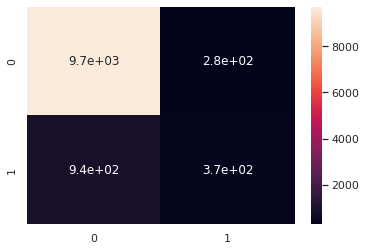

In [ ]:
sns.heatmap(cm, annot = True)

In [ ]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#XGBOOST
from xgboost import XGBClassifier

def models2(X_train, y_train):
  xg = XGBClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  xg.fit(X_train, y_train)

  print("Random Forest Classifier Training Accuracy: ", xg.score(X_train, y_train))

  return xg

In [ ]:
#model2 = models2(X_train, y_train)

In [ ]:
# XGBClassifier
# XGBC = XGBClassifier(random_state = 1).fit(X_train, y_train)
# pred_XGBC = XGBC.predict(X_test)

In [ ]:
# from sklearn import metrics
# print("Accuracy:",metrics.accuracy_score(y_test, pred_XGBC))

In [ ]:

# import xgboost as xgb
# model = xgb.XGBClassifier().fit(X_train, y_train)

# # make prediction
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# # Fitting XGBoost to the Training set
# from xgboost import XGBClassifier
# classifier = XGBClassifier()
# classifier.fit(X_train, y_train)

# pred_xgb = classifier.predict(X_test)

# #Model Evaluation
# xgb_acc = accuracy_score(y_test, pred_xgb)

# print('Accuracy Score: ' + str(xgb_acc))

# print('Precision Score: ' + str(precision_score(y_test, pred_xgb)))

# print('Recall Score: ' + str(recall_score(y_test, pred_xgb)))

# print('F1 Score: ' + str(f1_score(y_test, pred_xgb)))

# print('Classification Report: \n' + str(classification_report(y_test, pred_xgb)))

# **Naive Bayes Classifiers**

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB, BernoulliNB, ComplementNB

In [ ]:
def performance(y_true,y_predict,X_test, clf):
  print(f"Accuracy: {round(accuracy_score(y_true,y_predict),2)}")
  TP = confusion_matrix(y_true,y_predict)[0,0]
  FP = confusion_matrix(y_true,y_predict)[0,1]
  TN = confusion_matrix(y_true,y_predict)[1,1]
  FN = confusion_matrix(y_true,y_predict)[1,0]
  print(f"TP: {TP}")
  print(f"FP: {FP}")
  print(f"TN: {TN}")
  print(f"FN: {FN}")
  print(f"Sensitivity: {round((TP/(TP+ FP)),2)}")
  print(f"Specificity: {round((TN/(TN + FN)),2)}")
  print(f"Precision: {round((precision_score(y_true,y_predict)),2)}")
  print(f"Recall: {round((recall_score(y_true,y_predict)),2)}")
  print(f"Area Under ROC Curve: {round((roc_auc_score(y_true, clf.predict_proba(X_test)[:, 1])),2)}")

In [ ]:
from sklearn.metrics import roc_auc_score


## Multinomial Naive Bayes


Accuracy score for multinomial NB 0.8779085198619836
Confusion Matrix [[9645  349]
 [1031  278]]


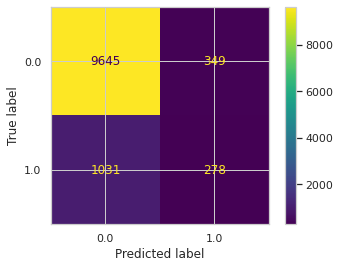

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
minmaxScaler = MinMaxScaler()
min_max_scaled_df_num = minmaxScaler.fit_transform(df[numerical_columns])
min_max_scaled_df_num_features = minmaxScaler.feature_names_in_
min_max_scaled_df_num = pd.DataFrame(min_max_scaled_df_num, columns= min_max_scaled_df_num_features , index = df.index)
min_max_df = pd.concat([min_max_scaled_df_num,df_1hot_merged], axis=1)
min_max_df = min_max_df.drop(['no', 'yes'], axis = 1)


X1_train, X1_test, y1_train, y1_test = train_test_split(min_max_df, target, test_size= 0.25, random_state =100)

multinomial_nb_classifier = MultinomialNB()
multinomial_nb_classifier.fit(X1_train, y1_train)
y1_predict = multinomial_nb_classifier.predict(X1_test)

print("Accuracy score for multinomial NB", accuracy_score(y1_test,y1_predict))
conf_matrix_MNB = confusion_matrix(y1_test,y1_predict)
print("Confusion Matrix",conf_matrix_MNB)
plot_confusion_matrix(multinomial_nb_classifier, X1_test,y1_test)

In [ ]:
TP_rate = conf_matrix_MNB[0,0]/(conf_matrix_MNB[0,0]+conf_matrix_MNB[0,1])
round(TP_rate,2) #senssitivity

0.97

In [ ]:
TN_rate = conf_matrix_MNB[1,1]/(conf_matrix_MNB[1,1]+conf_matrix_MNB[1,0])
round(TN_rate,2) #specificity

0.21

In [ ]:
FP_rate = conf_matrix_MNB[1,0]/(conf_matrix_MNB[1,1]+conf_matrix_MNB[1,0])
FP_rate

0.787624140565317

In [ ]:
success_rate = (conf_matrix_MNB[0,0]+conf_matrix_MNB[1,1])/(conf_matrix_MNB[0,0]+conf_matrix_MNB[0,1]+conf_matrix_MNB[1,0]+conf_matrix_MNB[1,1])
success_rate

0.8779085198619836

In [ ]:
error_rate = (conf_matrix_MNB[0,1]+conf_matrix_MNB[1,0])/(conf_matrix_MNB[0,0]+conf_matrix_MNB[0,1]+conf_matrix_MNB[1,0]+conf_matrix_MNB[1,1])
error_rate

0.12209148013801646

In [ ]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      9994
         1.0       0.44      0.21      0.29      1309

    accuracy                           0.88     11303
   macro avg       0.67      0.59      0.61     11303
weighted avg       0.85      0.88      0.86     11303



In [ ]:
performance(y1_test,y1_predict, X1_test,multinomial_nb_classifier )


Accuracy: 0.88
TP: 9645
FP: 349
TN: 278
FN: 1031
Sensitivity: 0.97
Specificity: 0.21
Precision: 0.44
Recall: 0.21
Area Under ROC Curve: 0.74


[0.         0.         0.         ... 0.99923606 1.         1.        ]
Area Under ROC Curve 0.7378443108645937


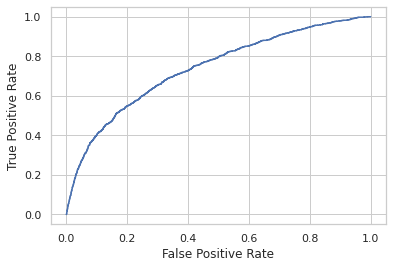

In [ ]:
import matplotlib.pyplot as plt
y1_predict_proba = multinomial_nb_classifier.predict_proba(X1_test)[::,1]
fpr, tpr, _ = roc_curve(y1_test,y1_predict_proba)
print(tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("Area Under ROC Curve", auc(fpr, tpr))

## Gaussian Naive Bayes

Accuracy score for Gaussian NB 0.8004954436875166
Confusion Matrix [[8358 1636]
 [ 619  690]]


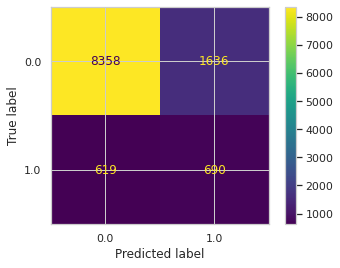

In [ ]:
gaussian_nb_classifier = GaussianNB()
gaussian_nb_classifier.fit(X_train, y_train)
y_predict = gaussian_nb_classifier.predict(X_test)

print("Accuracy score for Gaussian NB", accuracy_score(y_test,y_predict))
conf_matrix_GB = confusion_matrix(y_test,y_predict)
print("Confusion Matrix",conf_matrix_GB)
plot_confusion_matrix(gaussian_nb_classifier, X_test,y_test)

In [ ]:
performance(y_test,y_predict,X_test,gaussian_nb_classifier)

Accuracy: 0.8
TP: 8358
FP: 1636
TN: 690
FN: 619
Sensitivity: 0.84
Specificity: 0.53
Precision: 0.3
Recall: 0.53
Area Under ROC Curve: 0.77


In [ ]:
TP_rate = conf_matrix_GB[0,0]/(conf_matrix_GB[0,0]+conf_matrix_GB[0,1])
TP_rate #senssitivity

0.8363017810686412

In [ ]:
TN_rate = conf_matrix_GB[1,1]/(conf_matrix_GB[1,1]+conf_matrix_GB[1,0])
TN_rate #specificity

0.5271199388846448

In [ ]:
FP_rate = conf_matrix_GB[1,0]/(conf_matrix_GB[1,1]+conf_matrix_GB[1,0])
FP_rate

0.47288006111535524

In [ ]:
success_rate = (conf_matrix_GB[0,0]+conf_matrix_GB[1,1])/(conf_matrix_GB[0,0]+conf_matrix_GB[0,1]+conf_matrix_GB[1,0]+conf_matrix_GB[1,1])
success_rate

0.8004954436875166

In [ ]:
error_rate = (conf_matrix_GB[0,1]+conf_matrix_GB[1,0])/(conf_matrix_GB[0,0]+conf_matrix_GB[0,1]+conf_matrix_GB[1,0]+conf_matrix_GB[1,1])
error_rate

0.1995045563124834

[0.         0.18334607 0.18334607 ... 0.99923606 1.         1.        ]
Area Under ROC Curve 0.766997861054295


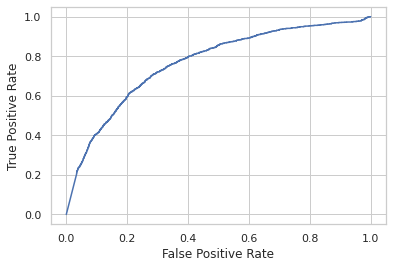

In [ ]:
y_predict_proba = gaussian_nb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_predict_proba)
print(tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("Area Under ROC Curve", auc(fpr, tpr))

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      9994
         1.0       0.30      0.53      0.38      1309

    accuracy                           0.80     11303
   macro avg       0.61      0.68      0.63     11303
weighted avg       0.86      0.80      0.82     11303



In [ ]:
(roc_curve(y_test,y_predict))

(array([0.        , 0.16369822, 1.        ]),
 array([0.        , 0.52711994, 1.        ]),
 array([2., 1., 0.]))

## Complement Naive Bayes

Accuracy score for Complement NB 0.6709723082367514
Confusion Matrix [[6688 3306]
 [ 413  896]]


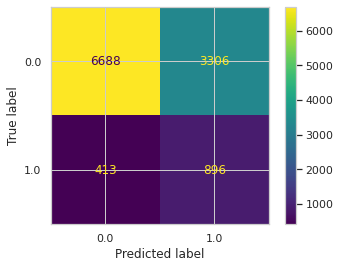

In [ ]:
complement_nb_classifier = ComplementNB()
complement_nb_classifier.fit(X1_train, y1_train)
y1_predict = complement_nb_classifier.predict(X1_test)

print("Accuracy score for Complement NB", accuracy_score(y1_test,y1_predict))
conf_matrix_CNB = confusion_matrix(y1_test,y1_predict)
print("Confusion Matrix",conf_matrix_CNB)
plot_confusion_matrix(complement_nb_classifier, X1_test,y1_test)

In [ ]:
performance(y1_test, y1_predict,X1_test, complement_nb_classifier )

Accuracy: 0.67
TP: 6688
FP: 3306
TN: 896
FN: 413
Sensitivity: 0.67
Specificity: 0.68
Precision: 0.21
Recall: 0.68
Area Under ROC Curve: 0.74


In [ ]:
TP_rate = conf_matrix_CNB[0,0]/(conf_matrix_CNB[0,0]+conf_matrix_CNB[0,1])
TP_rate #senssitivity

0.6692015209125475

In [ ]:
TN_rate = conf_matrix_CNB[1,1]/(conf_matrix_CNB[1,1]+conf_matrix_CNB[1,0])
TN_rate #specificity

0.6844919786096256

In [ ]:
FP_rate = conf_matrix_CNB[1,0]/(conf_matrix_CNB[1,1]+conf_matrix_CNB[1,0])
FP_rate

0.3155080213903743

In [ ]:
success_rate = (conf_matrix_CNB[0,0]+conf_matrix_CNB[1,1])/(conf_matrix_CNB[0,0]+conf_matrix_CNB[0,1]+conf_matrix_CNB[1,0]+conf_matrix_CNB[1,1])
success_rate

0.6709723082367514

In [ ]:
error_rate = (conf_matrix_CNB[0,1]+conf_matrix_CNB[1,0])/(conf_matrix_CNB[0,0]+conf_matrix_CNB[0,1]+conf_matrix_CNB[1,0]+conf_matrix_CNB[1,1])
error_rate

0.3290276917632487

In [ ]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.67      0.78      9994
         1.0       0.21      0.68      0.33      1309

    accuracy                           0.67     11303
   macro avg       0.58      0.68      0.55     11303
weighted avg       0.86      0.67      0.73     11303



In [ ]:
precision_score(y1_test,y1_predict)

0.21323179438362685

In [ ]:
(roc_curve(y1_test,y1_predict))

(array([0.        , 0.33079848, 1.        ]),
 array([0.        , 0.68449198, 1.        ]),
 array([2., 1., 0.]))

[0.00000000e+00 7.63941940e-04 7.63941940e-04 ... 9.99236058e-01
 1.00000000e+00 1.00000000e+00]
Area Under ROC Curve 0.8401359379416802


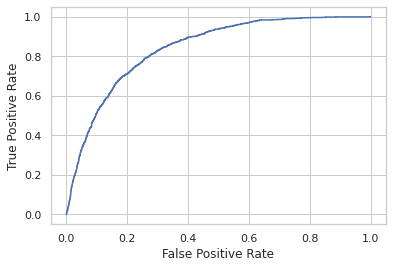

In [ ]:
y_predict_proba = complement_nb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_predict_proba)
print(tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("Area Under ROC Curve", auc(fpr, tpr))

## Bernoulli Naive Bayes

Accuracy score for Bernoulli NB 0.8576484119260374
Confusion Matrix [[9092  902]
 [ 707  602]]


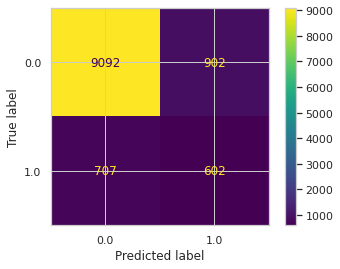

In [ ]:
bernoulli_nb_classifier = BernoulliNB()
bernoulli_nb_classifier.fit(X_train, y_train)
y_predict = bernoulli_nb_classifier.predict(X_test)

print("Accuracy score for Bernoulli NB", accuracy_score(y_test,y_predict))
conf_matrix_BNB = confusion_matrix(y_test,y_predict)
print("Confusion Matrix",conf_matrix_BNB)
plot_confusion_matrix(bernoulli_nb_classifier, X_test,y_test)

In [ ]:
performance(y_test, y_predict, X_test,bernoulli_nb_classifier )

Accuracy: 0.86
TP: 9092
FP: 902
TN: 602
FN: 707
Sensitivity: 0.91
Specificity: 0.46
Precision: 0.4
Recall: 0.46
Area Under ROC Curve: 0.8


In [ ]:
TP_rate = conf_matrix_BNB[0,0]/(conf_matrix_BNB[0,0]+conf_matrix_BNB[0,1])
TP_rate #senssitivity

0.9097458475085051

In [ ]:
TN_rate = conf_matrix_BNB[1,1]/(conf_matrix_BNB[1,1]+conf_matrix_BNB[1,0])
TN_rate #specificity

0.45989304812834225

In [ ]:
FP_rate = conf_matrix_BNB[1,0]/(conf_matrix_BNB[1,1]+conf_matrix_BNB[1,0])
FP_rate

0.5401069518716578

In [ ]:
success_rate = (conf_matrix_BNB[0,0]+conf_matrix_BNB[1,1])/(conf_matrix_BNB[0,0]+conf_matrix_BNB[0,1]+conf_matrix_BNB[1,0]+conf_matrix_BNB[1,1])
success_rate

0.8576484119260374

In [ ]:
error_rate = (conf_matrix_BNB[0,1]+conf_matrix_BNB[1,0])/(conf_matrix_BNB[0,0]+conf_matrix_BNB[0,1]+conf_matrix_BNB[1,0]+conf_matrix_BNB[1,1])
error_rate

0.14235158807396267

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      9994
         1.0       0.40      0.46      0.43      1309

    accuracy                           0.86     11303
   macro avg       0.66      0.68      0.67     11303
weighted avg       0.87      0.86      0.86     11303



In [ ]:
(roc_curve(y_test,y_predict))

(array([0.        , 0.09025415, 1.        ]),
 array([0.        , 0.45989305, 1.        ]),
 array([2., 1., 0.]))

[0.         0.         0.00229183 ... 1.         1.         1.        ]
Area Under ROC Curve 0.800665425993564


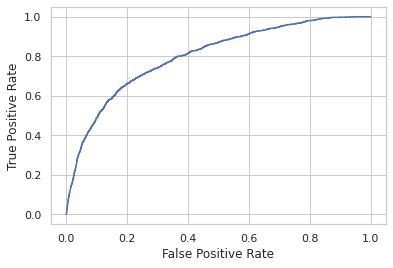

In [ ]:
y_predict_proba = bernoulli_nb_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_predict_proba)
print(tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("Area Under ROC Curve", auc(fpr, tpr))

## Categorical Naive Bayes

Accuracy score for Categorical NB 0.8353534459877908
Confusion Matrix [[8984 1010]
 [ 851  458]]


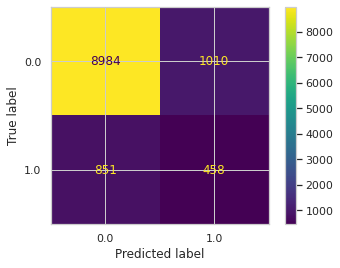

In [ ]:
categorical_nb_classifier = CategoricalNB(min_categories = df['y'].nunique())
categorical_nb_classifier.fit(X1_train, y1_train)
y1_predict = categorical_nb_classifier.predict(X1_test)

print("Accuracy score for Categorical NB", accuracy_score(y1_test,y1_predict))
conf_matrix_CaNB = confusion_matrix(y1_test,y1_predict)
print("Confusion Matrix",conf_matrix_CaNB)
plot_confusion_matrix(categorical_nb_classifier, X1_test,y1_test)

In [ ]:
performance(y1_test, y1_predict, X1_test,categorical_nb_classifier )

Accuracy: 0.84
TP: 8984
FP: 1010
TN: 458
FN: 851
Sensitivity: 0.9
Specificity: 0.35
Precision: 0.31
Recall: 0.35
Area Under ROC Curve: 0.72


In [ ]:
TP_rate = conf_matrix_CaNB[0,0]/(conf_matrix_CaNB[0,0]+conf_matrix_CaNB[0,1])
TP_rate #senssitivity

0.898939363618171

In [ ]:
TN_rate = conf_matrix_CaNB[1,1]/(conf_matrix_CaNB[1,1]+conf_matrix_CaNB[1,0])
TN_rate #specificity

0.34988540870893814

In [ ]:
FP_rate = conf_matrix_CaNB[1,0]/(conf_matrix_CaNB[1,1]+conf_matrix_CaNB[1,0])
FP_rate

0.6501145912910619

In [ ]:
success_rate = (conf_matrix_CaNB[0,0]+conf_matrix_CaNB[1,1])/(conf_matrix_CaNB[0,0]+conf_matrix_CaNB[0,1]+conf_matrix_CaNB[1,0]+conf_matrix_CaNB[1,1])
success_rate

0.8353534459877908

In [ ]:
error_rate = (conf_matrix_CaNB[0,1]+conf_matrix_CaNB[1,0])/(conf_matrix_CaNB[0,0]+conf_matrix_CaNB[0,1]+conf_matrix_CaNB[1,0]+conf_matrix_CaNB[1,1])
error_rate

0.16464655401220915

In [ ]:
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      9994
         1.0       0.31      0.35      0.33      1309

    accuracy                           0.84     11303
   macro avg       0.61      0.62      0.62     11303
weighted avg       0.84      0.84      0.84     11303



In [ ]:
(roc_curve(y1_test,y1_predict))

(array([0.        , 0.10106064, 1.        ]),
 array([0.        , 0.34988541, 1.        ]),
 array([2., 1., 0.]))

[0. 0. 0. ... 1. 1. 1.]
Area Under ROC Curve 0.718759368684618


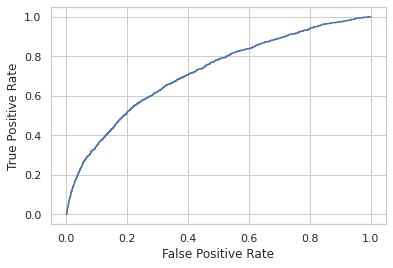

In [ ]:
y1_predict_proba = categorical_nb_classifier.predict_proba(X1_test)[::,1]
fpr, tpr, _ = roc_curve(y1_test,y1_predict_proba)
print(tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print ("Area Under ROC Curve", auc(fpr, tpr))

## Result for Naive Bayes

|    Naive Bayes Al-gorithm    | Accuracy | TP | FP | TN | Sensitivity | Specificity | Precision | Recall | Area Under ROC Curve |
|:----------------------------:|:--------:|:--:|:--:|:--:|:-----------:|:-----------:|:---------:|:------:|:--------------------:|
|    Multinomial Naive Bayes   |   d      |   d |  d  |   d |    d         |         d    |        d   |      d  |      d                |
|     Gaussian Naive Bayes     |          |    |    |    |             |             |           |        |                      |
|    Complement Naive Bayes    |          |    |    |    |             |             |           |        |                      |
|     Bernoulli naive Bayes    |          |    |    |    |             |             |           |        |                      |
|    Categorical Naive Bayes   |          |    |    |    |             |             |           |        |                      |
| Complex Bayes Net (Optional) |          |    |    |    |             |             |           |        |                      |


```
# This is formatted as code
```

IMG_75370DAFC1B4-1.jpeg

#Clustering

##Kmeans

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_1hot, target, test_size= 0.25, random_state =100)

In [ ]:
features_1hot

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.606965,0.256419,0.011016,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.288529,-0.437895,-0.416127,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.747384,-0.446762,-0.707361,-0.569351,-0.411453,-0.251940,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.571051,0.047205,-0.645231,-0.569351,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.747384,-0.447091,-0.233620,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,2.925401,1.429593,3.373797,0.721811,1.436189,1.050473,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,1.512791,-0.228024,0.970146,0.399020,-0.411453,-0.251940,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_train.shape

(33908, 77)

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X_train)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.42904576e-02,  6.54082326e-02,  2.07505513e-02,
        -2.12563251e-01,  2.08091579e+00,  1.24431260e+00,
         1.29584352e-01,  2.16475456e-01,  2.95279293e-02,
         1.57983825e-02,  2.11961632e-01,  5.22851232e-02,
         3.47940568e-02,  9.23453075e-02,  2.89637013e-02,
         1.60993041e-01,  2.40737258e-02,  3.19729171e-03,
         1.19052097e-01,  5.80214407e-01,  3.00733496e-01,
         1.33722024e-01,  5.27176979e-01,  3.04118864e-01,
         3.49821328e-02,  9.92288885e-01,  7.71111529e-03,
         3.19917247e-01,  6.80082753e-01,  8.57062253e-01,
         1.42937747e-01,  9.18375024e-01,  7.29734813e-02,
         8.65149520e-03,  1.12845590e-02,  3.68628926e-02,
         2.68948655e-02,  3.81794245e-02,  4.47620839e-02,
         4.51382358e-02,  4.53263118e-02,  4.25051721e-02,
         2.46379537e-02,  1.09084070e-02,  4.30694000e-02,
         4.87116795e-02,  5.43539590e-02,  5.02162874e-02,
         5.92439345e-02,  2.65187136e-02,  5.81154787e-0

In [ ]:
#X is a 2D array, every point has 2 feature value.
#plotting data samples in X to see the clusters.
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=1) #s is the size of dots.
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [ ]:
# plt.figure(figsize=(8, 4))
# plot_clusters(X_train)
# plt.show()

In [ ]:
X_train

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
40942,0.194355,-0.299295,0.119743,-0.246560,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31338,1.889487,1.246326,0.675029,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39943,-1.029906,-0.138033,-0.435543,-0.246560,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4413,-0.841558,-0.402424,-0.951997,2.981343,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
591,-0.276515,-0.256598,-0.695712,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,-1.500776,-0.139675,-0.555919,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
79,1.324443,-0.447091,-0.194789,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12119,1.230269,-0.108145,-0.412244,0.076230,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14147,0.288529,-0.424100,-0.027815,-0.246560,-0.411453,-0.25194,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

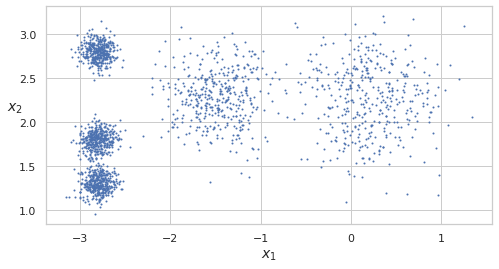

In [ ]:

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-1.42904576e-02,  6.54082326e-02,  2.07505513e-02,
        -2.12563251e-01,  2.08091579e+00,  1.24431260e+00,
         1.29584352e-01,  2.16475456e-01,  2.95279293e-02,
         1.57983825e-02,  2.11961632e-01,  5.22851232e-02,
         3.47940568e-02,  9.23453075e-02,  2.89637013e-02,
         1.60993041e-01,  2.40737258e-02,  3.19729171e-03,
         1.19052097e-01,  5.80214407e-01,  3.00733496e-01,
         1.33722024e-01,  5.27176979e-01,  3.04118864e-01,
         3.49821328e-02,  9.92288885e-01,  7.71111529e-03,
         3.19917247e-01,  6.80082753e-01,  8.57062253e-01,
         1.42937747e-01,  9.18375024e-01,  7.29734813e-02,
         8.65149520e-03,  1.12845590e-02,  3.68628926e-02,
         2.68948655e-02,  3.81794245e-02,  4.47620839e-02,
         4.51382358e-02,  4.53263118e-02,  4.25051721e-02,
         2.46379537e-02,  1.09084070e-02,  4.30694000e-02,
         4.87116795e-02,  5.43539590e-02,  5.02162874e-02,
         5.92439345e-02,  2.65187136e-02,  5.81154787e-0

In [ ]:
x = kmeans.labels_

In [ ]:
print(set(x))

{0, 1}


In [ ]:
X_new = np.random.randn(1,77)*0.01
kmeans.predict(X_new)

array([1], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X, 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=77, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    print(xx.shape)
    #print(yy)
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
#plot_decision_boundaries(kmeans, X_train)
plt.show()

<Figure size 576x288 with 0 Axes>

In [ ]:
kmeans.transform(X_new)

array([[3.20475796, 2.0087418 ]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X_train)
kmeans_iter2.fit(X_train)
kmeans_iter3.fit(X_train)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

In [ ]:
'''print(X_train.shape)
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train, show_ylabels=False)


plt.show()'''


'print(X_train.shape)\nplt.figure(figsize=(10, 8))\n\nplt.subplot(321)\nplot_data(X_train)\nplot_centroids(kmeans_iter1.cluster_centers_, circle_color=\'r\', cross_color=\'w\')\nplt.ylabel("$x_2$", fontsize=14, rotation=0)\nplt.tick_params(labelbottom=False)\nplt.title("Update the centroids (initially randomly)", fontsize=14)\n\nplt.subplot(322)\nplot_decision_boundaries(kmeans_iter1, X_train, show_xlabels=False, show_ylabels=False)\nplt.title("Label the instances", fontsize=14)\n\nplt.subplot(323)\nplot_decision_boundaries(kmeans_iter1, X_train, show_centroids=False, show_xlabels=False)\nplot_centroids(kmeans_iter2.cluster_centers_)\n\nplt.subplot(324)\nplot_decision_boundaries(kmeans_iter2, X_train, show_xlabels=False, show_ylabels=False)\n\nplt.subplot(325)\nplot_decision_boundaries(kmeans_iter2, X_train, show_centroids=False)\nplot_centroids(kmeans_iter3.cluster_centers_)\n\nplt.subplot(326)\nplot_decision_boundaries(kmeans_iter3, X_train, show_ylabels=False)\n\n\nplt.show()'

In [ ]:
kmeans.inertia_

343849.9270955785

In [ ]:

X_dist = kmeans.transform(X_train)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

343849.9270955775

## Clustering

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-1.42904576e-02,  6.54082326e-02,  2.07505513e-02,
        -2.12563251e-01,  2.08091579e+00,  1.24431260e+00,
         1.29584352e-01,  2.16475456e-01,  2.95279293e-02,
         1.57983825e-02,  2.11961632e-01,  5.22851232e-02,
         3.47940568e-02,  9.23453075e-02,  2.89637013e-02,
         1.60993041e-01,  2.40737258e-02,  3.19729171e-03,
         1.19052097e-01,  5.80214407e-01,  3.00733496e-01,
         1.33722024e-01,  5.27176979e-01,  3.04118864e-01,
         3.49821328e-02,  9.92288885e-01,  7.71111529e-03,
         3.19917247e-01,  6.80082753e-01,  8.57062253e-01,
         1.42937747e-01,  9.18375024e-01,  7.29734813e-02,
         8.65149520e-03,  1.12845590e-02,  3.68628926e-02,
         2.68948655e-02,  3.81794245e-02,  4.47620839e-02,
         4.51382358e-02,  4.53263118e-02,  4.25051721e-02,
         2.46379537e-02,  1.09084070e-02,  4.30694000e-02,
         4.87116795e-02,  5.43539590e-02,  5.02162874e-02,
         5.92439345e-02,  2.65187136e-02,  5.81154787e-0

In [ ]:
set(kmeans.labels_)

{0, 1}

In [ ]:

predict = kmeans.predict(X_test)
print(predict.shape)
actual = y_test.to_numpy().reshape(11303,)
print(actual)
count =0
for i, j in zip(actual, predict):
  if float(i) == float(j):
    count+=1
accuracy = (count/len(actual))*100
print(accuracy)

(11303,)
[0. 0. 0. ... 0. 0. 0.]
20.63169070158365


In [ ]:
kmeans.transform(X_test)

array([[4.17454074, 2.91946774],
       [3.95096357, 2.38664436],
       [3.61548486, 2.23126969],
       ...,
       [3.76737343, 2.27018028],
       [2.50414255, 3.99559569],
       [3.92813504, 2.61016503]])

In [ ]:
np.linalg.norm(np.tile(X_test, (1, k)).reshape(-1, k, 77) - kmeans.cluster_centers_, axis=2)

array([[4.17454074, 2.91946774],
       [3.95096357, 2.38664436],
       [3.61548486, 2.23126969],
       ...,
       [3.76737343, 2.27018028],
       [2.50414255, 3.99559569],
       [3.92813504, 2.61016503]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_train)
kmeans_iter2.fit(X_train)
kmeans_iter3.fit(X_train)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

In [ ]:
kmeans.inertia_

343849.9270955785

In [ ]:
kmeans_cluster2 = KMeans(n_clusters=2, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster3 = KMeans(n_clusters=3, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster4 = KMeans(n_clusters=4, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster5 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster6 = KMeans(n_clusters=6, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster7 = KMeans(n_clusters=7, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_cluster8 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)

In [ ]:
kmeans_cluster2.fit(X_train)
kmeans_cluster3.fit(X_train)
kmeans_cluster4.fit(X_train)
kmeans_cluster5.fit(X_train)
kmeans_cluster6.fit(X_train)
kmeans_cluster7.fit(X_train)
kmeans_cluster8.fit(X_train)

KMeans(algorithm='full', init='random', max_iter=1, n_init=1, random_state=1)

In [ ]:
inertias = []
inertias.append(kmeans_cluster2.inertia_)
inertias.append(kmeans_cluster3.inertia_)
inertias.append(kmeans_cluster4.inertia_)
inertias.append(kmeans_cluster5.inertia_)
inertias.append(kmeans_cluster6.inertia_)
inertias.append(kmeans_cluster7.inertia_)
inertias.append(kmeans_cluster8.inertia_)
print(inertias)

[364711.2923221198, 353541.14748369256, 341682.80603939225, 329005.6140105503, 324784.8867055398, 314869.9457864958, 300296.30628103873]


In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
inertias

[382682.67376761703,
 343849.9270955785,
 320217.0681005795,
 301017.58360407606,
 284156.93122756877,
 268128.97308861045,
 257417.24714333075,
 243529.07458984223,
 237138.6945729381]

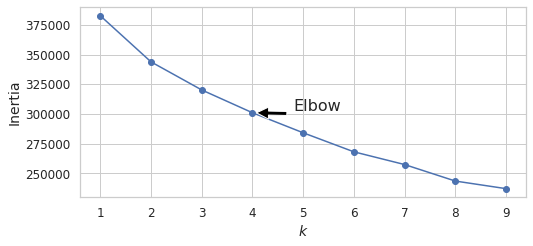

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_1hot, target, test_size= 0.30, random_state =100)

In [ ]:
X1_test = features_1hot[:13563]
y1_test = target[:13563]
X1_train = features_1hot[13564:]
y1_train = target[13564:]

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth = 2, random_state= 42)

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
tree_clf.score(X_train,y_train)

0.8899105760419629

In [ ]:
tree_clf.score(X_test, y_test)

0.8867590681214981

[Text(0.5, 0.8333333333333334, 'X[2] <= 1.135\ngini = 0.207\nsamples = 31647\nvalue = [27937, 3710]'),
 Text(0.25, 0.5, 'X[4] <= -0.307\ngini = 0.146\nsamples = 28496\nvalue = [26237, 2259]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.099\nsamples = 23344\nvalue = [22119, 1225]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.321\nsamples = 5152\nvalue = [4118, 1034]'),
 Text(0.75, 0.5, 'X[2] <= 2.087\ngini = 0.497\nsamples = 3151\nvalue = [1700, 1451]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.464\nsamples = 1765\nvalue = [1120, 645]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.487\nsamples = 1386\nvalue = [580, 806]')]

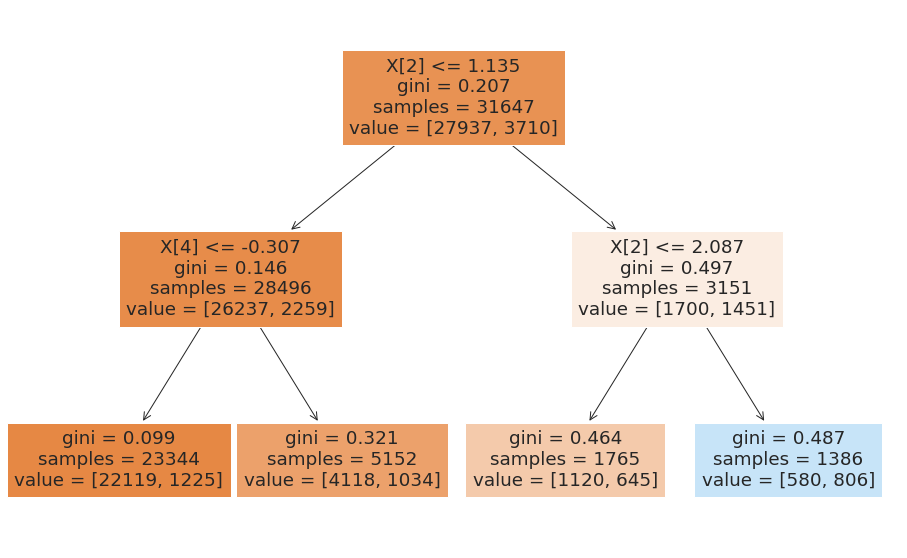

In [ ]:
plt.figure(figsize=(16,10))
plot_tree(tree_clf, filled = True)

In [ ]:
tree_clf.predict_proba(X_train)

array([[0.94752399, 0.05247601],
       [0.94752399, 0.05247601],
       [0.94752399, 0.05247601],
       ...,
       [0.94752399, 0.05247601],
       [0.94752399, 0.05247601],
       [0.94752399, 0.05247601]])

In [ ]:
y_pred = tree_clf.predict(X_train)

##Tree 1

In [ ]:
DT1_no_restriction = DecisionTreeClassifier()

In [ ]:
DT1_no_restriction.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
DT1_no_restriction.score(X1_train, y1_train)

1.0

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
kfold_validation=KFold(10)
results =cross_val_score(DT1_no_restriction,X1_train, y1_train,cv=kfold_validation, scoring= 'accuracy')
print(results)
print(f'mean accuracy is {round(np.mean(results), 3)}')

[0.82875197 0.82306477 0.84233807 0.88246445 0.7943128  0.65529226
 0.83759874 0.76801517 0.6795196  0.55530973]
mean accuracy is 0.767


In [ ]:
#plot_tree(DT1_no_restriction)

In [ ]:
def performance(y_true,y_predict,X_test, clf):
  print(f"Accuracy: {round(accuracy_score(y_true,y_predict),5)}")
  TP = confusion_matrix(y_true,y_predict)[0,0]
  FP = confusion_matrix(y_true,y_predict)[0,1]
  TN = confusion_matrix(y_true,y_predict)[1,1]
  FN = confusion_matrix(y_true,y_predict)[1,0]
  print(f"TP: {TP}")
  print(f"FP: {FP}")
  print(f"TN: {TN}")
  print(f"FN: {FN}")
  print(f"TP rate: {round((TP/(TP+ FP)),5)}")
  print(f"FP rate: {round((FN/(TN+ FN)),5)}")
  # print(f"Specificity: {round((TN/(TN + FN)),5)}")
  print(f"Precision: {round((precision_score(y_true,y_predict)),5)}")
  print(f"Recall: {round((recall_score(y_true,y_predict)),5)}")
  print(f"F_measure: {round((f1_score(y_true,y_predict)),5)}")
  #print(f"Area Under ROC Curve: {round((roc_auc_score(y_true, clf.predict_proba(X_test)[:, 1])),2)}")

In [ ]:
y1_predict = DT1_no_restriction.predict(X1_train)

In [ ]:
performance(y1_train, y1_predict, X1_train, DT1_no_restriction )

Accuracy: 1.0
TP: 26880
FP: 0
TN: 4767
FN: 0
TP rate: 1.0
FP rate: 0.0
Precision: 1.0
Recall: 1.0
F_measure: 1.0


In [ ]:
#DT_no_restriction.score(X_test, y_test)

In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
parameters = {'criterion': ('gini', 'entropy'),
              'max_depth' : (3,6,9),
              'min_samples_split': (1,3,6),
              'min_samples_leaf': (1,5,10,30)
              }
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [ ]:
DT = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv =5 , verbose = True)

In [ ]:
DT_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, cv =5 , scoring = scoring, refit= 'accuracy', verbose = True)

In [ ]:
DT_grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 6, 9),
                         'min_samples_leaf': (1, 5, 10, 30),
                         'min_samples_split': (1, 3, 6)},
             refit='accuracy',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=True)

In [ ]:
DT.fit(X1_train, y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 6, 9),
                                        'min_samples_leaf': (1, 5, 10, 30),
                                        'min_samples_split': (1, 3, 6)},
                   verbose=True)

In [ ]:
DT_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
#DT.best_estimator_

In [ ]:
DT_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [ ]:
DT_grid.best_score_

0.7713485979556479

In [ ]:
cv_results = pd.DataFrame(DT_grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,...,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,0.021701,0.004684,0.000000,0.000000,gini,3,1,1,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",NaN,...,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
1,0.074908,0.004255,0.025937,0.005928,gini,3,1,3,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851027,...,0.099612,33,0.862604,0.706392,0.745034,0.385633,0.575445,0.655022,0.162932,9
2,0.070471,0.003165,0.023342,0.000914,gini,3,1,6,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851027,...,0.099612,33,0.862604,0.706392,0.745034,0.385633,0.575445,0.655022,0.162932,9
3,0.018952,0.002181,0.000000,0.000000,gini,3,5,1,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",NaN,...,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51
4,0.071933,0.001599,0.024225,0.001535,gini,3,5,3,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.851027,...,0.099612,33,0.862604,0.706392,0.745034,0.385633,0.575445,0.655022,0.162932,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.192708,0.006146,0.024452,0.000886,entropy,9,10,3,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.800000,...,0.088049,8,0.530926,0.617033,0.386092,0.403029,0.684663,0.524349,0.116763,40
68,0.194142,0.008067,0.024643,0.001223,entropy,9,10,6,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.800000,...,0.087261,7,0.528238,0.618325,0.388369,0.403014,0.684913,0.524572,0.116482,39
69,0.017656,0.000294,0.000000,0.000000,entropy,9,30,1,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",NaN,...,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55
70,0.186659,0.007147,0.024269,0.000521,entropy,9,30,3,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.797788,...,0.086062,2,0.562009,0.652206,0.406316,0.426437,0.718923,0.553178,0.122464,32


In [ ]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_accuracy',
       'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy',
       'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy',
       'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision',
       'split2_test_precision', 'split3_test_precision',
       'split4_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_test_recall', 'split1_test_recall',
       'split2_test_recall', 'split3_test_recall', 'split4_test_recall',
       'mean_test_recall', 'std_test_recall', 'rank_test_recall',
       'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1',
       'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1',
       'split0_test_roc_auc', 'split1_test_roc_auc', '

|    Decision Tree   | Accuracy | TP Rate | FP Rate | Precision|Recall  | F measure | Area Under ROC Curve  |
|:----------------------------:|:--------:|:--:|:--:|:--:|:-----------:|:-----------:|:---------:|
|    Tree (no restriction)  |   d      |   d |  d  |   d |    d         |         d    |        d   |  
|     Tree 1    |          |    |    |    |             |             |           |        
|    Tree 2    |          |    |    |    |             |             |           |        
|     Tree 3   |          |    |    |    |             |             |           |        


In [ ]:
DT1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT1.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT1.score(X1_test, y1_test)

0.9602595296025953

The Decision tree generalise well to the new data set. This is because the classifier achieved a 96.03% accuracy on the test dataset. the accuracy is higher on the test dataset than on the training dataset

In [ ]:
y1_predict = DT1.predict(X1_test)

In [ ]:
performance(y1_test, y1_predict, X1_test, DT1)

Accuracy: 0.96026
TP: 12765
FP: 276
TN: 259
FN: 263
TP rate: 0.97884
FP rate: 0.50383
Precision: 0.48411
Recall: 0.49617
F_measure: 0.49007


In [ ]:
DT1.score(X1_train, y1_train)

0.858722785730085

##Tree 2

In [ ]:
X2_test = features_1hot[:27126]
y2_test = target[:27126]
X2_train = features_1hot[27127:]
y2_train = target[27127:]

In [ ]:
DT2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT2.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT2.score(X2_test, y2_test)

0.9496055444960555

In [ ]:
DT2.score(X2_train, y2_train)

0.783123202831232

In [ ]:
y2_predict = DT2.predict(X2_test)

In [ ]:
performance(y2_test, y2_predict, X2_test, DT2)

Accuracy: 0.94961
TP: 25759
FP: 0
TN: 0
FN: 1367
TP rate: 1.0
FP rate: 1.0
Precision: 0.0
Recall: 0.0
F_measure: 0.0


##Tree 3

In [ ]:
X3_test = features_1hot[:40689]
y3_test = target[:40689]
X3_train = features_1hot[40690:]
y3_train = target[40690:]

In [ ]:
DT3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT3.fit(X3_train, y3_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3)

In [ ]:
DT3.score(X3_test, y3_test)

0.6141463294747966

In [ ]:
DT3.score(X3_train, y3_train)

0.7029418270294183

In [ ]:
y3_predict = DT3.predict(X3_test)
performance(y3_test, y3_predict, X3_test, DT3)

Accuracy: 0.61415
TP: 22227
FP: 15303
TN: 2762
FN: 397
TP rate: 0.59225
FP rate: 0.12567
Precision: 0.15289
Recall: 0.87433
F_measure: 0.26027


##Random Forest

###Random Forest Tree 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForest = RandomForestClassifier(random_state = 100)

In [ ]:
random_Grid = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv =5 , scoring = scoring, refit= 'accuracy', verbose = True)

In [ ]:
random_Grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: ignored

In [ ]:
random_Grid.best_estimator_

In [ ]:
randomForest1 = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=3)

In [ ]:
randomForest1.fit(X1_train, y1_train)

In [ ]:
randomForest1.score(X1_test, y1_test)

In [ ]:
randomForest1.score(X1_train, y1_train)

In [ ]:
y1_predict_randomForest = randomForest1.predict(X1_test)

In [ ]:
performance(y1_test, y1_predict_randomForest, X1_test, randomForest1 )

###Random Forest Tree 2

In [ ]:
randomForest2 = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=3)

In [ ]:
randomForest2.fit(X2_train, y2_train)

In [ ]:
randomForest2.score(X2_test, y2_test)

In [ ]:
randomForest2.score(X2_train, y2_train)

In [ ]:
y2_predict_randomForest = randomForest2.predict(X2_test)

In [ ]:
performance(y2_test, y2_predict_randomForest, X2_test, randomForest2 )

###Random Forest Tree 3

In [ ]:
randomForest3 = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=30,
                       min_samples_split=3)

In [ ]:
randomForest3.fit(X3_train, y3_train)

In [ ]:
randomForest3.score(X3_test, y3_test)

In [ ]:
randomForest3.score(X3_train, y3_train)

In [ ]:
y3_predict_randomForest = randomForest3.predict(X3_test)

In [ ]:
performance(y3_test, y3_predict_randomForest, X3_test, randomForest3 )

|    Decistion Tree    | Accuracy | TP Rate | FP Rate | Precision|Recall  | F measure | Area Under ROC Curve  |
|:----------------------------:|:--------:|:--:|:--:|:--:|:-----------:|:-----------:|:---------:|
|    Tree 1   |   0.96     |   0.98|  0.5  |   0.48 |    0.5       |         0.49    |        0.92   |  
|     Tree 2     |     0.95     |  1  | 1   |  0  |      0       |    0         |       0.8    |        
|    Tree 3    |       0.61   |   0.59 |  0.13  |  0.15  |     0.87        |           0.26  |    0.83       |        
|     DT without restriction (on Training set)    |     1     | 1   | 0   |   1 |    1         |         1    |        1   |        
|   DT Grid Search CV   |   0.96       |  0.98  |  0.5  |  0.48  |    0.5         |     0.49        |      0.92     |       
| DT Randomised CV |       0.96   |  0.98  |  0.5  |   0.48 |     0.5        |        0.49     |       0.94    |
| Random Forest 1|0.96|1|1|0|0|0|0.9
|Random Forest 2|0.95|1|1|0|0|0|0.72
|Random Forest 3|0.8|0.83|0.51|0.19|0.49|0.28|0.75


#Balancing our imbalanced Data

---



In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
dummy = pd.concat([features_1hot ,target], axis=1)

In [ ]:
neg_dummy = dummy[dummy['y'] == 1.0]
neg_dummy

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,feb,jan,jul,jun,mar,may,nov,oct,sep,y
83,1.701139,0.322106,3.043732,-0.569351,-0.411453,-0.251940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
86,1.418617,-0.432640,4.694057,-0.569351,-0.411453,-0.251940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
87,0.006007,-0.030305,4.391174,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
129,1.324443,0.365788,1.245848,-0.569351,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
168,1.230269,-0.386987,1.610861,-0.246560,-0.411453,-0.251940,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,3.019575,0.488624,0.162458,-0.569351,-0.001976,3.221163,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45205,-1.500776,-0.281559,0.496406,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45206,0.947747,-0.176460,2.791329,0.076230,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45207,2.831227,0.120447,0.768224,-0.246560,-0.411453,-0.251940,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
pos_dummy = dummy[dummy['y'] == 0.0]

pos_dummy_sliced = pos_dummy[:5289]

In [ ]:
balanced_df = pd.concat([neg_dummy ,pos_dummy_sliced], axis=0)

In [ ]:
balanced_features = balanced_df.drop('y', axis = 1)
balanced_features

,age,balance,duration,campaign,pdays,previous,admin.,blue-collar,entrepreneur,housemaid,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
83,1.701139,0.322106,3.043732,-0.569351,-0.411453,-0.25194,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
86,1.418617,-0.432640,4.694057,-0.569351,-0.411453,-0.25194,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,0.006007,-0.030305,4.391174,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
129,1.324443,0.365788,1.245848,-0.569351,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
168,1.230269,-0.386987,1.610861,-0.246560,-0.411453,-0.25194,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,-0.747384,-0.718379,-0.117127,-0.246560,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5451,-1.124080,-0.403080,-0.420010,1.044601,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5452,-1.218254,-0.326226,0.593484,0.076230,-0.411453,-0.25194,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5453,-0.841558,0.052460,0.170224,0.076230,-0.411453,-0.25194,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
balanced_target = balanced_df['y']
balanced_target

83      1.0
86      1.0
87      1.0
129     1.0
168     1.0
       ... 
5450    0.0
5451    0.0
5452    0.0
5453    0.0
5454    0.0
Name: y, Length: 10578, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size = 0.3, random_state = 100)

In [ ]:
scoring

['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [ ]:
balanced_DT_Grid = GridSearchCV(DecisionTreeClassifier(), param_grid = parameters, cv =5, scoring = scoring, refit = 'neg_mean_absolute_error', verbose = True)

In [ ]:
balanced_DT_Grid.fit(X_train, y_train)

ValueError: ignored

In [ ]:
balanced_DT_Grid.best_estimator_

In [ ]:
balanced_Tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)

In [ ]:
balanced_Tree1.fit(X_train, y_train)

In [ ]:
balanced_Tree1.score(X_test, y_test)

In [ ]:
balanced_y_predict = balanced_Tree1.predict(X_test)

In [ ]:
performance(y_test, balanced_y_predict, X_test, balanced_Tree1)

In [ ]:
confusion_matrix(y_test, balanced_y_predict)

In [ ]:
plt.figure(figsize=(32,20))
plot_tree(balanced_Tree1, filled= True)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(balanced_features, balanced_target, test_size = 0.6, random_state = 100)

In [ ]:
balanced_Tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)

In [ ]:
balanced_Tree2.fit(X2_train, y2_train)

In [ ]:
balanced_Tree2.score(X2_test, y2_test)

In [ ]:
y2_pred = balanced_Tree1.predict(X2_test)

In [ ]:
performance(y2_test, y2_pred, X2_test, balanced_Tree2)

In [ ]:
plt.figure(figsize=(32,20))
plot_tree( balanced_Tree2, filled= True)

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(balanced_features, balanced_target, test_size = 0.9, random_state = 100)

In [ ]:
balanced_Tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=3)

In [ ]:
balanced_Tree3.fit(X3_train, y3_train)

In [ ]:
balanced_Tree3.score(X3_test, y3_test)

In [ ]:
y3_pred = balanced_Tree3.predict(X3_test)

In [ ]:
performance(y3_test, y3_pred, X3_test, balanced_Tree3)

In [ ]:
plt.figure(figsize=(32,20))
plot_tree( balanced_Tree3, filled= True)

|    Decistion Tree    | Accuracy |TP|FP|TN|FN| TP Rate | FP Rate | Precision|Recall  | F measure|
|:----------------------------:|:--------:|:--:|:--:|:--:|:-----------:|:-----------:|:----------:|:---------:|:--------:|:---------:|
|    Tree 1   |   0.98     |   1584|  23  |   1527 |    40       |         0.99    |        0.03  |  0.99|0.97|0.98
|     Tree 2     |     0.98     |  3147  | 31  |  3102 |      67      |    0.99     |       0.02   |     0.99|0.98|0.98   
|    Tree 3    |       0.97   |   4658 |  095  |  4618 |     150       |           0.98 |    0.03     |  0.98|0.97|0.97

#Linear Regression

## Linear regression using Scikit-Learn

In [ ]:
#pd.to_csvbalanced_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters

In [ ]:
y_pred_test = np.around(lin_reg.predict(X_test),0)
y_pred_train = np.around(lin_reg.predict(X_train),0)

In [ ]:

print("Mean Squared Error: %.2f"
      %mean_squared_error(y_train, y_pred_train))
print("Variance: %.2f"
      %r2_score(y_train, y_pred_train))

In [ ]:
print("Mean Squared Error: %.2f"
      %mean_squared_error(y_test, y_pred_test))
print("Variance: %.2f"
      %r2_score(y_test, y_pred_test))

## Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state = 100)
log_reg.fit(X_train,y_train)

In [ ]:
y_pred_test_log = np.around(log_reg.predict(X_test),0)
y_pred_train_log = np.around(log_reg.predict(X_train),0)

In [ ]:
print("Mean Squared Error: %.2f"
      %mean_squared_error(y_train, y_pred_train_log))
print("Variance: %.2f"
      %r2_score(y_train, y_pred_train_log))

In [ ]:
print("Mean Squared Error: %.2f"
      %mean_squared_error(y_test, y_pred_test_log))
print("Variance: %.2f"
      %r2_score(y_test, y_pred_test_log))

## Linear regression using stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [ ]:
sgd_Regressor = SGDRegressor()
sgd_Regressor.fit(X_train,y_train)

In [ ]:
parameters = {
              'learning_rate' : (['constant']),
              'eta0': (0.001, 0.01, 0.1,),
              'max_iter': (10,100,1000,10000)
              }

In [ ]:
scoring = ['neg_mean_absolute_error']

In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
SGD_grid = GridSearchCV(SGDRegressor(), param_grid = parameters, cv =5 , scoring = scoring, refit= 'neg_mean_absolute_error', verbose = True)

In [ ]:
SGD_grid.fit(X_train, y_train)

In [ ]:
SGD_grid.best_params_

In [ ]:
cv_results = pd.DataFrame(SGD_grid.cv_results_)
cv_results.sort_values('rank_test_neg_mean_absolute_error')

#Perceptron Learning

##10 Fold Cross Validation

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import numpy as np

In [ ]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size = 0.3, random_state = 100)

In [ ]:
per_clf = Perceptron(max_iter=100000, tol=1e-3, random_state=42, alpha=0.00001)

In [ ]:
from sklearn.model_selection import KFold, cross_validate
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
#crv(cross_val_score(per_clf,balanced_features,balanced_target,cv=kfold_validation,scoring= 'accuracy'))

In [ ]:
#crv(cross_val_score(per_clf,balanced_features,balanced_target,cv=kfold_validation,scoring= 'precision'))

In [ ]:
#crv(cross_val_score(per_clf,balanced_features,balanced_target,cv=kfold_validation,scoring= 'recall'))

In [ ]:
#crv(cross_val_score(per_clf,balanced_features,balanced_target,cv=kfold_validation,scoring= 'f1'))

In [ ]:
#_scoring = ['accuracy', 'precision', 'recall', 'f1']
#results = cross_validate(estimator = per_clf, X = balanced_features, y = balanced_target, cv = 10, scoring = _scoring, return_train_score = True)

In [ ]:
#per_clf.fit(balanced_features, balanced_target)

Accuracy 0.8192474948005294
Confusion Matrix [[3646 1643]
 [ 269 5020]]


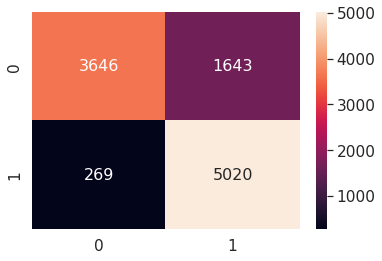

Accuracy: 0.81925
TP: 3646
FP: 1643
TN: 5020
FN: 269
TP rate: 0.68936
FP rate: 0.05086
Precision: 0.75341
Recall: 0.94914
F_measure: 0.84003


In [ ]:
y_pred = cross_val_predict(estimator=per_clf, X=balanced_features, y=balanced_target, cv=10, method='predict')
print("Accuracy", accuracy_score(balanced_target,y_pred))
conf_matrix_Perceptron = confusion_matrix(balanced_target,y_pred)
print("Confusion Matrix",conf_matrix_Perceptron)
df_cm = pd.DataFrame(conf_matrix_Perceptron)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, fmt='.5g',annot_kws={"size": 16}) # font size
plt.show()
performance(balanced_target, y_pred, balanced_features, per_clf)

In [ ]:
parameters = {'hidden_layer_sizes': (100,200,300),
              'activation' : ('identity', 'logistic', 'tanh', 'relu'),
              'solver': ('lbfgs', 'sgd', 'adam'),
              #'learning_rate': ('constant'),
              'learning_rate_init': (0.0001, 0.001, 0.01, 0.1),
              'max_iter': (200, 300, 400)
              }
#scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

In [ ]:
parameters = {'hidden_layer_sizes': (100,200),
              'activation' : ('logistic', 'tanh'),
              'solver': ('sgd', 'adam'),
              #'learning_rate': ('constant'),
              'learning_rate_init': (0.001, 0.01,),
              'max_iter': (200, 300)
              }

In [ ]:
MLPClassifier_Grid = RandomizedSearchCV(MLPClassifier(), param_distributions = parameters, cv =10 , verbose = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balanced_features, balanced_target, test_size = 0.3, random_state = 100)

In [ ]:
MLPClassifier_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
MLPClassifier_Grid.best_params_

In [ ]:
MLPClassifier_Grid.best_estimator_

In [ ]:
cv_results = pd.DataFrame(MLPClassifier_Grid.cv_results_)

In [ ]:
cv_results.sort_values('rank_test_score')

##Classifier 1

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(balanced_features, balanced_target, test_size = 0.3, random_state = 100)

In [ ]:
per_clf =MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=300)

In [ ]:
#per_clf = Perceptron(max_iter=100000, tol=1e-3, random_state=42, alpha=0.00001)

In [ ]:
per_clf.fit(X_train1, y_train1)
y_pred1 = per_clf.predict(X_test1)
print("Accuracy", accuracy_score(y_test1,y_pred1))
conf_matrix_Perceptron = confusion_matrix(y_test1,y_pred1)
print("Confusion Matrix",conf_matrix_Perceptron)
df_cm1 = pd.DataFrame(conf_matrix_Perceptron)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm1, annot=True, fmt='.5g',annot_kws={"size": 16}) # font size
plt.show()
print('Performance on Test dataset')
performance(y_test1,y_pred1, X_test1, per_clf)
print('')
print('Performance on Training dataset')
y_pred1_train = per_clf.predict(X_train1)
performance(y_train1,y_pred1_train, X_train1, per_clf)

##Classifier 2

In [ ]:
# X_train2 = X_train1[2221:]
# y_train2 = y_train1[2221:]
# X_test2 = pd.concat([X_test1, X_train1[0:2221]])
# y_test2 = pd.concat([y_test1, y_train1[0:2221]])
# print(X_train1.shape, X_test1.shape, X_train2.shape, X_test2.shape)
# print(balanced_features.shape)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(balanced_features, balanced_target, test_size = 0.6, random_state = 100)

In [ ]:
per_clf.fit(X_train2, y_train2)
y_pred2 = per_clf.predict(X_test2)
print("Accuracy", accuracy_score(y_test2,y_pred2))
conf_matrix_Perceptron = confusion_matrix(y_test2,y_pred2)
print("Confusion Matrix",conf_matrix_Perceptron)
df_cm2 = pd.DataFrame(conf_matrix_Perceptron)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm2, annot=True, fmt='.5g',annot_kws={"size": 16}) # font size
plt.show()
print('Performance on Test dataset')
performance(y_test2,y_pred2, X_test2, per_clf)
print('')
print('Performance on Training dataset')
y_pred2_train = per_clf.predict(X_train2)
performance(y_train2,y_pred2_train, X_train2, per_clf)

##Classifier 3

In [ ]:
# X_train3 = X_train1[4442:]
# y_train3 = y_train1[4442:]
# X_test3 = pd.concat([X_test1, X_train1[0:4442]])
# y_test3 = pd.concat([y_test1, y_train1[0:4442]])
# print(X_train1.shape, X_test1.shape, X_train2.shape, X_test2.shape, X_train3.shape, X_test3.shape)
# print(balanced_features.shape)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(balanced_features, balanced_target, test_size = 0.9, random_state = 100)

In [ ]:
per_clf.fit(X_train3, y_train3)
y_pred3 = per_clf.predict(X_test3)
print("Accuracy", accuracy_score(y_test3,y_pred3))
conf_matrix_Perceptron = confusion_matrix(y_test3,y_pred3)
print("Confusion Matrix",conf_matrix_Perceptron)
df_cm3 = pd.DataFrame(conf_matrix_Perceptron)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, fmt='.5g',annot_kws={"size": 16}) # font size
plt.show()
print('Performance on Test dataset')
performance(y_test3,y_pred3, X_test3, per_clf)
print('')
print('Performance on Training dataset')
y_pred3_train = per_clf.predict(X_train3)
performance(y_train3,y_pred3_train, X_train3, per_clf)

##Summary

Test Dataset

| Classifier | Accuracy | TP | FP | TN | FN | TP Rate | FP Rate | Precision | Recall | F_Measure |
|------------|----------|----|----|----|----|---------|---------|-----------|--------|-----------|
| 1          |  0.98299       | 1586   |  21  | 1534   |   33 |   0.9863      |     0.02106     |   0.9865       |   0.97894     |       0.9827    |
| 2          |    0.98424      | 3145   |   33 |   3102 | 67   |   0.98962      |     0.02114    |   0.98947        |  0.97866      |    0.98414       |
| 3          |   0.97826       |  4678  |  75  |  4636  |  132  |   0.98422      |      0.02768   |    0.98408       |  0.97232      |     0.97816      |

Training Dataset

| Classifier | Accuracy | TP | FP | TN | FN | TP Rate | FP Rate | Precision | Recall | F_Measure |
|------------|----------|----|----|----|----|---------|---------|-----------|--------|-----------|
| 1          |    0.98717      |  3860  |  22  |    3649| 73   |    0.99402     |     0.01961            |  0.99401   |   0.98039    |    0.98715      |
| 2          |    0.98747      | 2097   |   14 |    2081|   39 |     0.99337    |    0.0184     |     0.99332      |   0.9816     |      0.98743     |
| 3          |  0.9877        |   531 |  5  |  513  |  8  |    0.99067     |    0.01536     |    0.99035       |       0.98464 |      0.98749     |

##Activation Function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [ ]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [ ]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

In [ ]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

##Regression MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train1.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train1, y_train1, epochs=20, validation_data=(X_test1, y_test1))
mse_test = model.evaluate(X_test1, y_test1)
y_proba = model.predict(X_test1)
y_pred1 = y_proba >=0.5
print("Accuracy", accuracy_score(y_test1,y_pred1))
conf_matrix_MLP = confusion_matrix(y_test1,y_pred1)
print("Confusion Matrix",conf_matrix_MLP)
df_cm4 = pd.DataFrame(conf_matrix_MLP)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm4, annot=True, fmt='.5g',annot_kws={"size": 16}) # font size
plt.show()
performance(y_test1,y_pred1, X_test1, model)

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#Image Classification using Keras

In [ ]:
import sys
assert sys.version_info >= (3, 5)

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
from tensorflow import keras

In [ ]:
X = np.load('smiley_X.npy')

In [ ]:
y = np.load('smiley_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(100, 9, 9, 1)

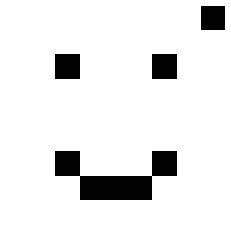

In [ ]:
plt.imshow(np.squeeze(X_train[0]), cmap="binary")
plt.axis('off')
plt.show()

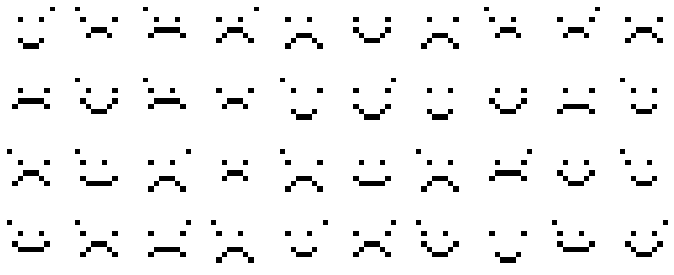

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(np.squeeze(X_train[index]), cmap="binary", interpolation="nearest")
        plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[9,9,1]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9,9,1]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 81)                0         
                                                                 
 dense (Dense)               (None, 300)               24600     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 55,710
Trainable params: 55,710
Non-trainable params: 0
_________________________________________________________________


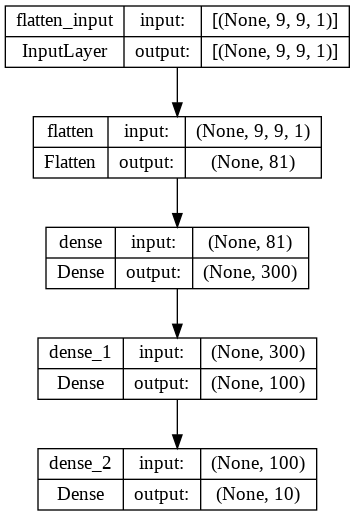

In [ ]:
import graphviz
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.04130217, -0.01480626, -0.03692389, ..., -0.04665644,
         0.06509314, -0.11620719],
       [ 0.00803746, -0.05238014, -0.0989579 , ...,  0.01017053,
        -0.04661814, -0.07025951],
       [-0.10439809, -0.11641914,  0.1197992 , ..., -0.07148819,
         0.1201226 , -0.12366715],
       ...,
       [-0.11654184,  0.0326689 ,  0.05009104, ...,  0.09881817,
        -0.09044267, -0.00145391],
       [-0.00577983, -0.10353066,  0.06421167, ...,  0.03093824,
         0.05991793, -0.04134194],
       [-0.00243981, -0.00276937,  0.08891822, ..., -0.11833563,
        -0.0617749 ,  0.00882575]], dtype=float32)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
4/4 [==============================] - 1s 86ms/step - loss: 2.0611 - accuracy: 0.3500 - val_loss: 1.9995 - val_accuracy: 0.5909
Epoch 2/30
4/4 [==============================] - 0s 12ms/step - loss: 1.9429 - accuracy: 0.6300 - val_loss: 1.8912 - val_accuracy: 0.7045
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 1.8298 - accuracy: 0.7300 - val_loss: 1.7813 - val_accuracy: 0.7045
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 1.7128 - accuracy: 0.7400 - val_loss: 1.6681 - val_accuracy: 0.6818
Epoch 5/30
4/4 [==============================] - 0s 12ms/step - loss: 1.5976 - accuracy: 0.6900 - val_loss: 1.5598 - val_accuracy: 0.7045
Epoch 6/30
4/4 [==============================] - 0s 13ms/step - loss: 1.4854 - accuracy: 0.7200 - val_loss: 1.4522 - val_accuracy: 0.6364
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 1.3786 - accuracy: 0.6800 - val_loss: 1.3526 - val_accuracy: 0.6364
Epoch 8/30
4/4 [===========

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 4}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

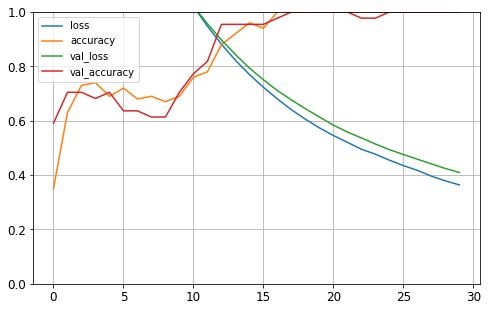

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 1.0000


[0.40979671478271484, 1.0]

In [ ]:
X_new = X_test[10:13]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 104ms/step


array([[0.75, 0.2 , 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01],
       [0.75, 0.21, 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.  ],
       [0.37, 0.54, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([0, 0, 1])

In [ ]:
class_names = ["0","1"]

In [ ]:
np.array(class_names)[y_pred]

array(['0', '0', '1'], dtype='<U1')

In [ ]:
y_new = y_test[10:13]
y_new

array([0., 0., 1.])

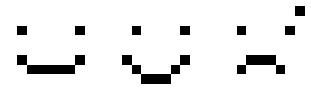

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index+1)
    plt.imshow(np.squeeze(image), cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#Week *11*

##ANN Training

In [ ]:
import sys
assert sys.version_info >= (3, 5)

In [ ]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [ ]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
from tensorflow import keras

In [ ]:
X = np.load('smiley_X.npy')

In [ ]:
y = np.load('smiley_y.npy')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(100, 9, 9, 1)

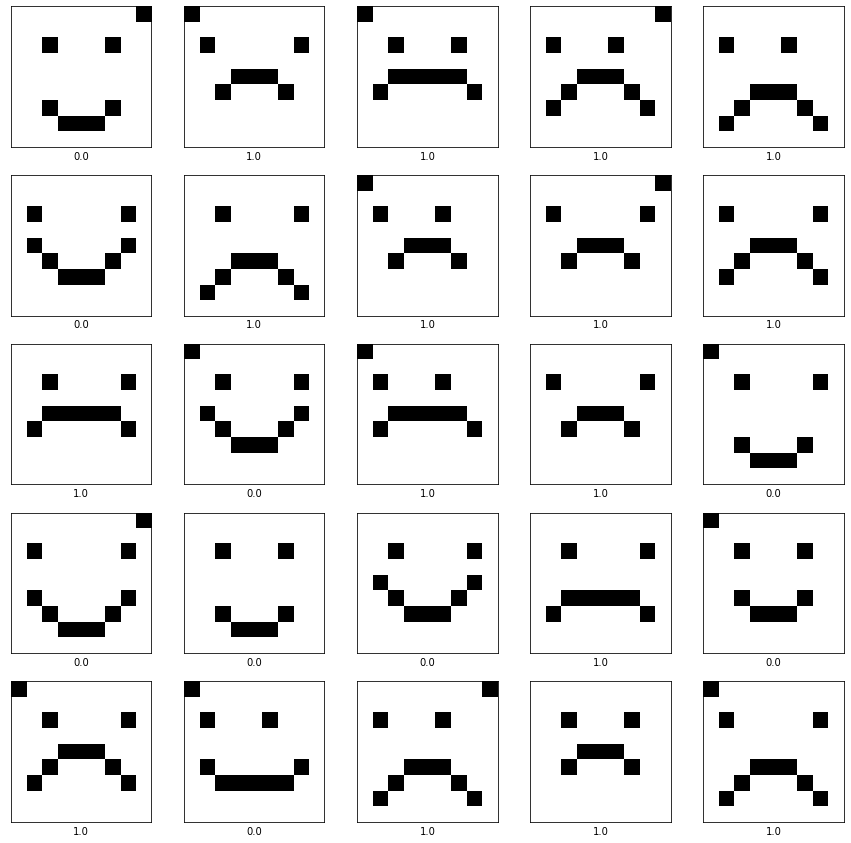

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(X_train[i]), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,9,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 0.7538 - accuracy: 0.4100
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6700
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.8000
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.9200
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.9500
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.9600
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3603 - accuracy: 0.9600
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.9700
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.9800
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2448 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [ ]:
classifications = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


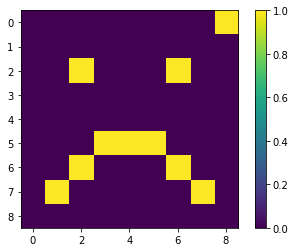

In [ ]:
plt.imshow(np.squeeze(X_test[3]))
plt.colorbar()
plt.grid(False)

In [ ]:

def plot_value_array(i, predictions_array, true_label):

    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    print(predicted_label)
    print(true_label)
    thisplot[int(predicted_label)].set_color('red')
    thisplot[int(true_label)].set_color('blue')

In [ ]:
def plot_image(i, predictions_array, true_label, img):

    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

0
0.0


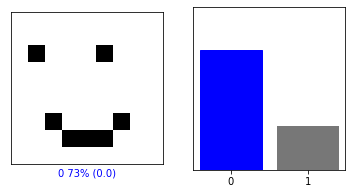

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

1
1.0


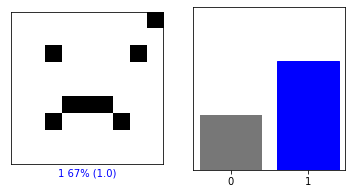

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

0
0.0
0
0.0
0
0.0
1
1.0
1
1.0
0
0.0
1
1.0
1
1.0
1
1.0
0
0.0
0
0.0
0
0.0
1
1.0
0
0.0
0
0.0
0
0.0
0
0.0
0
0.0
1
1.0
1
1.0
0
0.0
1
1.0
1
1.0
0
0.0
0
0.0
1
1.0
0
0.0
0
0.0
1
1.0
1
1.0
1
1.0
1
1.0
1
1.0
0
0.0
1
1.0
0
0.0
1
1.0
0
0.0
1
1.0
1
1.0
0
0.0
0
0.0
0
0.0
1
1.0


IndexError: ignored

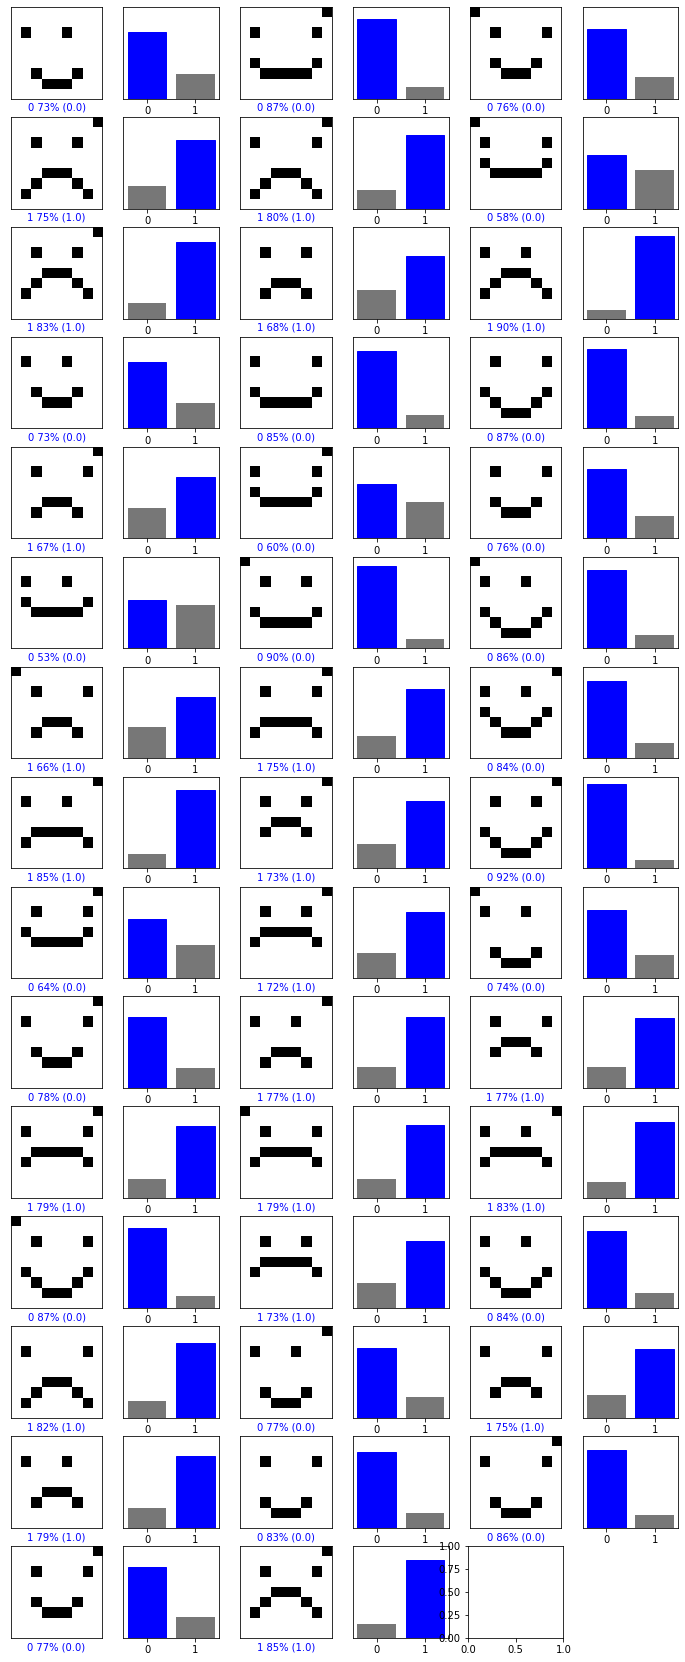

In [ ]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test)
plt.tight_layout()
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(100, 9, 9, 1)
(44, 9, 9, 1)


##CNN

In [ ]:
X_train=X_train.reshape(100, 9, 9, 1)
X_test = X_test.reshape(44, 9, 9, 1)
X_train.shape #28*28=784

(100, 9, 9, 1)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(9, 9, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
  tf.keras.layers.MaxPooling2D(1,1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 5, 5, 64)          1664      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 1, 1, 64)          16448     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)             

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 11ms/step - loss: 0.6795 - accuracy: 0.6500
Epoch 2/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6224 - accuracy: 0.9200
Epoch 3/10
4/4 [==============================] - 0s 11ms/step - loss: 0.5686 - accuracy: 0.9200
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.4935 - accuracy: 0.9200
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 0.4059 - accuracy: 0.9200
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.3070 - accuracy: 0.9200
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.2197 - accuracy: 0.9200
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1494 - accuracy: 0.9600
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1078 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0640 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 1.0


In [ ]:
classifications = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print(classifications[3])

[0.05131663 0.9486833 ]


In [ ]:
np.argmax(classifications[3])

1

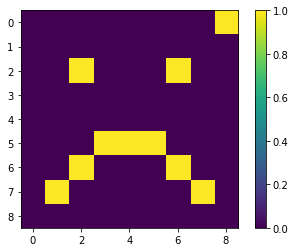

In [ ]:
plt.imshow(np.squeeze(X_test[3].reshape(9,9,1)))
plt.colorbar()
plt.grid(False)

1/1 [==============================] - 0s 18ms/step


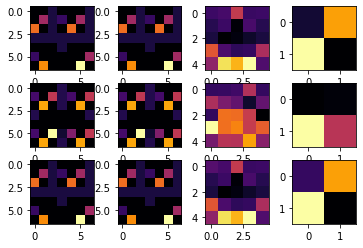

In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 9, 9, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

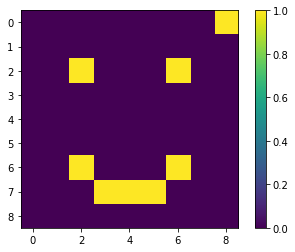

In [ ]:
plt.imshow(np.squeeze(X_train[FIRST_IMAGE].reshape(9,9,1)))
plt.colorbar()
plt.grid(False)

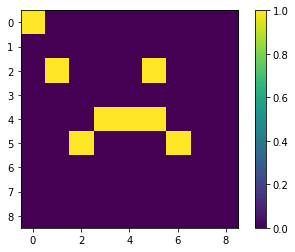

In [ ]:
plt.imshow(np.squeeze(X_train[SECOND_IMAGE].reshape(9,9,1)))
plt.colorbar()
plt.grid(False)

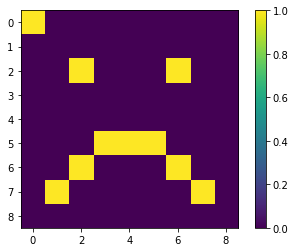

In [ ]:
plt.imshow(np.squeeze(X_train[THIRD_IMAGE].reshape(9,9,1)))
plt.colorbar()
plt.grid(False)